# To find potential customers for different services provided by the company using past data and provide possible changes for sales conversions.


### Task : The company could charge money only for the number of services being used and hence, to increase revenue, we had to find customers which could use more services based on different factors present in the dataset

## Data set Information
1. <b> The data provided contained the list of the Customer IDs along with the number of services bought (divided into 9 categories from P1 to P9), ratios of services being used (ex: P1_Ratio, P2_Ratio, etc.), amount of services assigned(ex: P1_E, P2_E), customer size(ex: 10K+, 1K+, etc.), segment (S_1 to S_5), date of purchase and few unknown variables( Var1, Var2, etc.)
2. <b>  It contained approx. 6000 observations spread across 32 columns. 

## Different steps were performed in the process :
### 1. <b> Data cleaning and Preprocessing :
* <b> Firstly, we performed the cleaning of the data to remove inconsistencies like ratios being more than 1 or less than 0 i.e. the ratios for different services (like P1_Ratios,etc.) were set to maxiumim value of 1 and minimuim value of 0
* <b> We also removed the missing values data i.e.the last 929 observations contained NA values for most of the variables and could lead to wrong results and hence were removed for better analysis.
* <b> Then we calculated the percentile scores for all the variables so that we may use these in classifying data into categories later as explained in next step. We also calculated these percentile scores grouped as a function of the Customer Size.    
* This was followed by performing time analysis i.e. we calculated the time since the purchase of the data assuming the current date to be 31st December,2019 so that it may be used as a featurefor classification and prediction in the machine learing algorithms.

### 2. <b> Data Engineering :
<b >In order to predict the potential customers, the following approach was used: 
    
* The data was divided into categories(0 and 1) based on the percentage of the services used where ‘1’ meant the customer was using services above a certain value ( ex: more than 0.45 quantile or above 0.57 ratio for P_1 services) and '0' meant that the customer was not using the services above that particular value 
* The observations which were present in the bottom 10% with respect to the number of services used were removed since they were assumed to be useless targets for conversion and hence, would only increase the noise in the data
* We also changed the values of Var1, Var2, Var3 to numerical values i.e. 1 if the variable was True and 0 if the variable is False for a particular observation. This was done so that these variables may be used as features in the classification and prediction algorithms 
* We also changed the categorical variables : Segment and CustSize into dummy variables using one-hot encoding method so that they may also be used as features in the algorithms       

### 3. <b> Classification :
<b>Then the data were classified using various classification algorithms into 0 and 1 which were used as “Actual Values”.The purpose behind this is to find which of the observation values were classified into '1' and '0' on the basis of the P1_Ratio cutoff value calculated above using the percentiles and which of the data was being classified into '1' and '0' on the basis of machine learning algorithms using all the variables except for the P1_Ratio as features.So, the observations which had been classified as '0' on the basis of P1_Ratio cutoff value but were being classified as '1' on the basis of the machine learning algorithm were considered to be potential customers i.e. they might not be using particular amount of services at present but can be expected to use more on the basis of their characteristics and hence, could be targeted for sales.   
    
<b> In order to perfrom classification part, we used 4 classification algorithms -
1. Logistic Regression
2. Decision Trees
3. Random Forest Classifier
4. XGboost Classifier 
    
This classification was based on all the features including ratios of services used, time since purchase, the number of services assigned, the number of services bought, Customer size, Segment except for the P1_Ratio since it was already used to divide the data into the categories
    
We used 4 classification algorithms so that we can assure that all and only the potential customers are being found.    

###  Details of classification:
* <b> Each classification algorithm consisted of 4 iterations.
* <b> The test data in 1st iteration was removed and training set was used as total data for 2nd iteration and similarly, the test data in 2nd iteration was removed and training set was used as the total dataset for the third iteration. 
* <b> In 4th iteration, the whole dataset which was given the actual value as ‘0’  was used as the test data.
    
<b>This approach assured that each observation had been tested at least 4 times(one for each of the 4th iteration in each of the 4 algorithms) and maximuim of 8 times(if it had been present in the 1st or 2nd or 3rd iteartion test data in each algorithm also)    
    
<b> After performing the 4 classification algorithms, the datasets for each one was merged into one containg the predictions for each of the 16 iterations(4 each for 4 algorithms).In the first three iterations for each algorithm, only a part of the data had been tested and hence, the other observations had missing values so the missing values were filled with 0. This was done so that we may calculate the sum i.e. the number of iterations in which the observation had been predicted as '1'. For example, a sum of 3 for an observation meant that it had been predicted as '1' in three iterations among the 16 iterations. So, as the value of sum increases, it signifies that the observation has been predicted as '1' in more number of iterations and hence, is more likely to be a potential customer. The maximuim value of the sum is 8 since each observation can only be presetnt in 8 iteartions at maximuim. A sum of 0 meant that the data is unlikely to be a potential customer since it had not been predicted as '1' in any of the iterations.    

### 4. <b> Regression :
* <b> The next step was to predict the possible changes for these observations which was done using Regression.
* <b> The K-Nearest Neighbors Regression algorithm was used to predict the number of changes possible in these observations.
* <b> First, we performed the KNN Regression of random split of data in order to know the optimuim of value of k i.e. the number of neighbors to be used for minimuim error
* <b> Then we used Recursive Feature Extraction in order to know the most important features and whether that helps in the regression analysis or not  

### <b> Important Feature extraction :
* <b> Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.
* <b> RFE attempts to eliminate dependencies and collinearity that may exist in the model.
* <b> We performed RFE using Random Forest Regression in order to know which were variables were considered by the algorithm to be useful in the prediction analysis of P1_Ratio
* <b> We listed the features according to their rank and chose the best 15 features as fetres for prediction
* <b> We again performed KNN Regression on the same random split of data but only these "important" features were used and found the error to be lower than when we were using all the variables and so, decided to use these 15 features for prediction.    

### 5. <b> Final Analysis
* <b> We performed KNN Regression using split of data such that the observations which had been classified as '1' on the basis of P1_Ratio cutoff value were used as test data and the observations which had been classified as '0' were used as the training set
* <b> The K-Nearest Neighbors Regression algorithm was used to predict the P1_Ratio on the basis of the features
* <b> The difference in the actual ratios and the predicted ratios ( i.e. predicted by the KNN model) was the possible change for the observations in the training set i.e. data which had actually been considered as '0'. This change was saved as P1_Delta
* <b> The P1_Delta value which when multiplied by the individual’s Customer Size gave the number of services that could be used more by the customer and hence add to the company’s revenue i.e. the possible changes for each observation. This was saved as P1_Potential.
* <b> On changing the different parameters such as the sum value , minimuim P1_Delta and minimuim P1_Potential, the customers which are considered to act as "potential" customers can been calculated along with the predicted possible changes for them.   

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
warnings.filterwarnings("ignore")
# %matplotlib inline

In [3]:
#Importing the data file
import io
data=pd.read_excel("data.xlsx")

In [4]:
data.head(10)

,Month,CustomerID,Var1,Var2,Var3,Purchase_date,P1_Ratio,P2_Ratio,P3_Rat,P4_Ratio,...,P5_E,P6_E,P7,P8,P9,P71,P81,P91,Segment,CustSize
0,Jun,I8MRLFUV7CYAXGQK91G,True,False,False,2018-03-08 00:00:00,0.742353,0.460392,0.718140,0.351200,...,1665.200000,1978.588272,2077.0,2076.0,2084.0,44.0,1544.0,22.0,S_5,1K+
1,Apr,LRFWE3GUC7EYUUW3MUQ,True,True,False,1/30/2014,0.609234,0.002651,0.000113,0.025484,...,35994.389998,29695.719995,33092.0,1377.0,126.0,74.0,3.0,3019.0,S_3,10K+
2,Jun,MDVMS58GINQSHAEQ8BQ,True,False,False,12/24/2013,0.771869,0.057143,0.028571,0.300000,...,5664.318860,7082.002288,10848.0,195.0,218.0,5.0,10.0,10.0,S_3,10K+
3,May,SM31P3ITIQSNHBA0CZ3A,True,False,False,2019-01-01 00:00:00,0.877647,0.066667,0.135714,0.223967,...,1700.000000,2550.000000,3325.0,1197.0,1197.0,25.0,171.0,0.0,S_3,1K+
4,Jun,TWWCNJOMNWYWVVVBFSPG,True,False,False,1/15/2015,0.661285,0.007608,0.001467,0.005041,...,10565.092663,8761.498068,13990.0,878.0,759.0,9.0,16.0,1.0,S_3,10K+
5,Apr,FLKHNGMTPVXW3ICMRDG,True,False,False,2017-01-10 00:00:00,1.005390,0.295648,0.173522,1.266667,...,941.070000,1640.840000,2828.0,2432.0,2433.0,6.0,367.0,0.0,S_4,1K+
6,May,JASKRHTEFFYPWDJVZ9G,True,False,False,2019-01-03 00:00:00,0.922198,0.290110,0.290549,0.373202,...,778.120000,732.760000,2219.0,2219.0,2219.0,31.0,661.0,7.0,S_4,1K+
7,Jun,NMWYFVPHHEBLNU0OWNDW,True,True,False,2018-09-05 00:00:00,0.895152,0.012416,0.843910,0.797990,...,4210.400000,4124.040000,5033.0,163.0,5022.0,190.0,4282.0,756.0,S_5,1K+
8,Jun,NSIXPZFKLWRS56DJMH5W,True,True,False,1/30/2014,0.616349,0.002698,0.000111,0.025666,...,21297.205666,20115.708054,31733.0,1210.0,130.0,77.0,3.0,1211.0,S_3,10K+
9,May,0ZCLFDSCJFPIRELYF4IFW,True,False,False,2017-11-03 00:00:00,0.000000,0.000000,0.000000,0.083576,...,4228.000000,7701.000000,28.0,35.0,27.0,178.0,0.0,NaN,S_2,10K+


In [ ]:
a=df["Height"].isna().sum()
b=data["Height"].count()
c=a/b
d=data["Height"].median()
return(c,d)

5949

In [888]:
#So there are 5949 observations spread across 32 variables
data.shape

(5949, 32)

In [889]:
#Various variables present in the dataset
data.columns

Index(['Month', 'CustomerID', 'Var1', 'Var2', 'Var3', 'Purchase_date',
       'P1_Ratio', 'P2_Ratio', 'P3_Rat', 'P4_Ratio', 'P5_Ratio', 'P6_Ratio',
       'P1_Size', 'P2_Size', 'P3_Size', 'P4_Size', 'P5_Size', 'P6_Size',
       'P1_E', 'P2_E', 'P3_E', 'P4_E', 'P5_E', 'P6_E', 'P7', 'P8', 'P9', 'P71',
       'P81', 'P91', 'Segment', 'CustSize'],
      dtype='object')

In [890]:
data.rename(columns={"P3_Rat":"P3_Ratio"},inplace=True)

In [891]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
P1_Ratio,5949.0,1.109725,40.188290,-3.202222e+02,0.040826,0.644127,0.842756,3.077333e+03
P2_Ratio,5949.0,0.673154,33.086402,-1.055556e+02,0.012641,0.102323,0.320433,2.547667e+03
P3_Ratio,5949.0,0.565829,26.525493,-3.974359e+01,0.000667,0.050320,0.292364,2.044000e+03
P4_Ratio,5949.0,0.695435,14.830305,-1.114500e+02,0.015333,0.167535,0.629371,1.013000e+03
P5_Ratio,5949.0,0.142474,5.118524,-8.679962e-01,0.000000,0.002597,0.036579,3.918333e+02
P6_Ratio,5949.0,0.503977,0.289531,0.000000e+00,0.256520,0.507670,0.757440,9.999500e-01
P1_Size,5949.0,5909.987897,11356.256228,0.000000e+00,521.000000,3098.000000,6438.000000,2.044450e+05
P2_Size,5949.0,2247.510842,6328.534833,0.000000e+00,92.000000,591.000000,1946.000000,1.681840e+05
P3_Size,5020.0,7219.446215,12832.428329,0.000000e+00,2080.750000,3811.500000,7709.000000,2.088660e+05
P4_Size,5020.0,3026.663546,13113.551649,0.000000e+00,2.000000,408.000000,1960.250000,3.784180e+05


# 1. Data Cleaning

In [892]:
#Gives us the number of missing values for each variable
data.isnull().sum()

Month              0
CustomerID         0
Var1               0
Var2               0
Var3               0
Purchase_date      0
P1_Ratio           0
P2_Ratio           0
P3_Ratio           0
P4_Ratio           0
P5_Ratio           0
P6_Ratio           0
P1_Size            0
P2_Size            0
P3_Size          929
P4_Size          929
P5_Size          929
P6_Size          929
P1_E             929
P2_E             929
P3_E             929
P4_E             929
P5_E             929
P6_E             929
P7               929
P8               929
P9               929
P71              929
P81              929
P91              975
Segment          929
CustSize         929
dtype: int64

### We can see that there are 929 observations which have missing data in most of the variables and hence, it is better to remove these observations for better analysis

In [893]:
#Missing Data
null_data=pd.isnull(data["Segment"])
data[null_data]

,Month,CustomerID,Var1,Var2,Var3,Purchase_date,P1_Ratio,P2_Ratio,P3_Ratio,P4_Ratio,...,P5_E,P6_E,P7,P8,P9,P71,P81,P91,Segment,CustSize
5020,Jun,IGRATYZDEHPCBRPGKTYHLA,True,False,False,9/19/2014,0.245894,0.002500,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5021,May,IGVAO5KWOSWUKUKOHH6GYA,True,False,False,9/29/2015,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5022,Apr,IGWJIURELKZBRJE7EUEJA,True,False,False,2016-01-12 00:00:00,0.821197,0.219785,0.015898,0.639647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5023,May,IH5AB6EPQHDCMJ2EJTT3A,True,False,False,10/30/2012,0.203614,0.837719,0.605263,0.595122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5024,Apr,IHE2GOBWQJFEENEVZVFW,True,False,False,4/22/2014,0.007821,0.000536,0.004149,0.029425,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5944,Apr,L2EAMPDECOEHD5DO106VG,True,True,False,2017-02-06 00:00:00,0.954083,0.152975,0.224725,0.218605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5945,Apr,L2HTPKHAAYASDA6ODPEA2W,True,False,False,2016-01-05 00:00:00,0.668590,0.004441,0.000346,0.878074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5946,Apr,L2J9BWRMICYL8Q6OJ3W5HQ,True,True,False,2018-01-09 00:00:00,0.773134,0.024182,0.432321,0.100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5947,Apr,L2OGUFRDPGJGGNPUFUATEA,True,False,False,2017-09-04 00:00:00,0.820412,0.462549,0.235655,0.577869,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### So the 929 observations with missing data common among most variables are rows 5020 - 5948

In [894]:
#Dropping rows 5020-5948 since they contain missing values for most of the variables hence to prevent miscalculations
data=data.iloc[:5019]

In [895]:
data.isnull().sum()

Month             0
CustomerID        0
Var1              0
Var2              0
Var3              0
Purchase_date     0
P1_Ratio          0
P2_Ratio          0
P3_Ratio          0
P4_Ratio          0
P5_Ratio          0
P6_Ratio          0
P1_Size           0
P2_Size           0
P3_Size           0
P4_Size           0
P5_Size           0
P6_Size           0
P1_E              0
P2_E              0
P3_E              0
P4_E              0
P5_E              0
P6_E              0
P7                0
P8                0
P9                0
P71               0
P81               0
P91              46
Segment           0
CustSize          0
dtype: int64

#### The P91 variable still has 46 missing values but since these are not missing among other variables and since the P91 variable was later found not to be so important in both classification of P1_Actual and regression of P1_Ratio, we can keep it .

### Cleaning the values to remove inconsistencies

In [896]:
#Since the maximuim and minimuim values for ratio is 1 and 0 respectively, setting these values as the maximuim and minimuim values possible
P_Ratios=pd.DataFrame(columns=["P1_Ratio","P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio"])
#Setting values above 1 to be 1
#Setting values below 0 to be 0
for p in P_Ratios:
    data.loc[data[p]<0,p]=0
    data.loc[data[p]>1,p]=1
#P1_E is the number of services assigned by the customer internally and P1_Size is the number of services bought by the customer
#Since the number of assigned services cannot be greater than the number of bought services, 
#Setting the maximuim vlues of assigned services to be the number of bought services
for i in range(len(data)):
  if data.loc[i,"P1_E"]>data.loc[i,"P1_Size"]:
    data.loc[i,"P1_E"]=data.loc[i,"P1_Size"]
  if data.loc[i,"P2_E"]>data.loc[i,"P2_Size"]:
    data.loc[i,"P2_E"]=data.loc[i,"P2_Size"]  
  if data.loc[i,"P3_E"]>data.loc[i,"P3_Size"]:
    data.loc[i,"P3_E"]=data.loc[i,"P3_Size"] 
  if data.loc[i,"P4_E"]>data.loc[i,"P4_Size"]:
    data.loc[i,"P4_E"]=data.loc[i,"P4_Size"]
  if data.loc[i,"P5_E"]>data.loc[i,"P5_Size"]:
    data.loc[i,"P5_E"]=data.loc[i,"P5_Size"]
  if data.loc[i,"P6_E"]>data.loc[i,"P6_Size"]:
    data.loc[i,"P6_E"]=data.loc[i,"P6_Size"]
  if data.loc[i,"P71"]>data.loc[i,"P7"]:
    data.loc[i,"P71"]=data.loc[i,"P7"]
  if data.loc[i,"P81"]>data.loc[i,"P8"]:
    data.loc[i,"P81"]=data.loc[i,"P8"]  
  if data.loc[i,"P91"]>data.loc[i,"P9"]:
    data.loc[i,"P91"]=data.loc[i,"P9"]
data.head()

,Month,CustomerID,Var1,Var2,Var3,Purchase_date,P1_Ratio,P2_Ratio,P3_Ratio,P4_Ratio,...,P5_E,P6_E,P7,P8,P9,P71,P81,P91,Segment,CustSize
0,Jun,I8MRLFUV7CYAXGQK91G,True,False,False,2018-03-08 00:00:00,0.742353,0.460392,0.718140,0.351200,...,1665.200000,1978.588272,2077.0,2076.0,2084.0,44.0,1544.0,22.0,S_5,1K+
1,Apr,LRFWE3GUC7EYUUW3MUQ,True,True,False,1/30/2014,0.609234,0.002651,0.000113,0.025484,...,35994.389998,29695.719995,33092.0,1377.0,126.0,74.0,3.0,126.0,S_3,10K+
2,Jun,MDVMS58GINQSHAEQ8BQ,True,False,False,12/24/2013,0.771869,0.057143,0.028571,0.300000,...,5664.318860,7082.002288,10848.0,195.0,218.0,5.0,10.0,10.0,S_3,10K+
3,May,SM31P3ITIQSNHBA0CZ3A,True,False,False,2019-01-01 00:00:00,0.877647,0.066667,0.135714,0.223967,...,1700.000000,2550.000000,3325.0,1197.0,1197.0,25.0,171.0,0.0,S_3,1K+
4,Jun,TWWCNJOMNWYWVVVBFSPG,True,False,False,1/15/2015,0.661285,0.007608,0.001467,0.005041,...,10565.092663,8761.498068,13990.0,878.0,759.0,9.0,16.0,1.0,S_3,10K+


## Quantiles

#### Calculating the percentiles for all the ratios so that we may decide on how to split the data into '1' and '0' group where '1' refers to customers who are considered to be using the services and '0' refers to customers who are not using the services properly i.e. they may have bought many services but are not using them for unknown reasons

In [897]:
#Calculating the percentiles for different variables, especially the ratios.
data_quantile=data.quantile([.4,.45, .5,.55, .6,.65, .7,.75,.8,.85,.9],axis=0) 
data_quantile.T

,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90
Var1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Var2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Var3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
P1_Ratio,0.461555,0.573569,0.651616,0.707917,0.755090,0.790621,0.819335,0.844605,0.867956,0.893100,0.923206
P2_Ratio,0.058340,0.080000,0.108481,0.137458,0.175363,0.211928,0.270954,0.329143,0.413633,0.491825,0.636139
P3_Ratio,0.013489,0.028262,0.052867,0.088206,0.132499,0.183052,0.241535,0.293017,0.362061,0.450309,0.544857
P4_Ratio,0.082347,0.116998,0.176515,0.257086,0.353012,0.434071,0.543795,0.631504,0.723297,0.794300,0.865164
P5_Ratio,0.000627,0.001429,0.002749,0.005100,0.008761,0.014913,0.024105,0.036607,0.059069,0.100635,0.179028
P6_Ratio,0.412542,0.463189,0.509770,0.560408,0.609512,0.655807,0.705934,0.761260,0.809508,0.854789,0.900332
P1_Size,2407.000000,2782.200000,3123.000000,3537.600000,4066.000000,4740.000000,5490.600000,6418.000000,7862.600000,9955.400000,13134.600000


In [898]:
data_quantile[["P1_Ratio","P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio"]]

,P1_Ratio,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio
0.40,0.461555,0.058340,0.013489,0.082347,0.000627,0.412542
0.45,0.573569,0.080000,0.028262,0.116998,0.001429,0.463189
0.50,0.651616,0.108481,0.052867,0.176515,0.002749,0.509770
0.55,0.707917,0.137458,0.088206,0.257086,0.005100,0.560408
0.60,0.755090,0.175363,0.132499,0.353012,0.008761,0.609512
0.65,0.790621,0.211928,0.183052,0.434071,0.014913,0.655807
0.70,0.819335,0.270954,0.241535,0.543795,0.024105,0.705934
0.75,0.844605,0.329143,0.293017,0.631504,0.036607,0.761260
0.80,0.867956,0.413633,0.362061,0.723297,0.059069,0.809508
0.85,0.893100,0.491825,0.450309,0.794300,0.100635,0.854789


#### So, for example the 45th percentile observation for P1_Ratio has P1_Ratio as 0.573 and the observations below that will be having lesser P1_Ratio values while the observations above that will be having higher P1_Ratio values

## Customer Size Feature

In [1014]:
#Gives the number of customers grouped by their size
data["CustSize"].value_counts()

1K+     2759
10K+    2243
500+      11
<100       6
Name: CustSize, dtype: int64

#### So most of the customers are those with size 1K+ followed by those with size 10K+

In [900]:
#Calculating the percentiles , grouped by the customer size
data_CustSize=data.groupby("CustSize")["P1_Ratio","P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio"].quantile([.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9])
data_CustSize

P1_Ratio  P2_Ratio  P3_Ratio  P4_Ratio  P5_Ratio  P6_Ratio
CustSize                                                                 
10K+     0.40  0.042249  0.013612  0.000686  0.027834  0.000395  0.404362
         0.45  0.127637  0.023137  0.001574  0.043916  0.000951  0.457424
         0.50  0.276048  0.039419  0.003908  0.067021  0.002172  0.502640
         0.55  0.388040  0.056273  0.009229  0.094207  0.004003  0.552326
         0.60  0.475879  0.078935  0.026258  0.140091  0.007657  0.605532
         0.65  0.593852  0.118012  0.052378  0.219012  0.012002  0.649614
         0.70  0.664787  0.160169  0.100828  0.325013  0.019815  0.697278
         0.75  0.739283  0.207522  0.158823  0.430092  0.031222  0.750795
         0.80  0.792478  0.276394  0.228816  0.556839  0.050903  0.803678
         0.85  0.842364  0.375302  0.314492  0.666236  0.088186  0.850594
         0.90  0.879014  0.510870  0.456847  0.771376  0.161527  0.895290
1K+      0.40  0.705118  0.115814  0.065231  0.174691  0.000954  0.418200
         0.45  0.741294  0.136861  0.100183  0.250069  0.001835  0.467884
         0.50  0.775402  0.169974  0.139640  0.336957  0.003498  0.514780
         0.55  0.798753  0.201796  0.180354  0.405455  0.006246  0.564480
         0.60  0.820115  0.245052  0.228410  0.500000  0.010921  0.614656
         0.65  0.839258  0.294373  0.267853  0.599311  0.017440  0.660777
         0.70  0.856462  0.347181  0.315410  0.661604  0.027709  0.716364
         0.75  0.876361  0.412375  0.367533  0.739981  0.043230  0.768560
         0.80  0.895241  0.472530  0.435893  0.792345  0.067263  0.814326
         0.85  0.915470  0.582897  0.501297  0.844605  0.115320  0.859573
         0.90  0.939585  0.688099  0.600586  0.902973  0.194216  0.908006
500+     0.40  0.004000  0.052000  0.000000  0.000000  0.000000  0.494190
         0.45  0.148000  0.178422  0.000000  0.000000  0.000000  0.512910
         0.50  0.292000  0.304843  0.000000  0.000000  0.000000  0.531630
         0.55  0.336000  0.309117  0.000000  0.000000  0.000000  0.597795
         0.60  0.380000  0.313390  0.000000  0.000000  0.000000  0.663960
         0.65  0.452857  0.330484  0.000000  0.002000  0.000000  0.680275
         0.70  0.525714  0.347578  0.000000  0.004000  0.000000  0.696590
         0.75  0.589629  0.368671  0.226378  0.182000  0.000000  0.754440
         0.80  0.653543  0.389764  0.452756  0.360000  0.000000  0.812290
         0.85  0.826772  0.454882  0.499711  0.546667  0.040000  0.816610
         0.90  1.000000  0.520000  0.546667  0.733333  0.080000  0.820930
<100     0.40  0.700000  0.350000  0.022222  0.000000  0.000000  0.496100
         0.45  0.718750  0.387500  0.172917  0.138889  0.000000  0.527530
         0.50  0.737500  0.425000  0.323611  0.277778  0.000000  0.558960
         0.55  0.756250  0.462500  0.474306  0.416667  0.000000  0.590390
         0.60  0.775000  0.500000  0.625000  0.555556  0.000000  0.621820
         0.65  0.781250  0.525000  0.631250  0.611111  0.002778  0.652378
         0.70  0.787500  0.550000  0.637500  0.666667  0.005556  0.682935
         0.75  0.793750  0.575000  0.643750  0.722222  0.008333  0.713492
         0.80  0.800000  0.600000  0.650000  0.777778  0.011111  0.744050
         0.85  0.818750  0.612500  0.656250  0.777778  0.014583  0.767393
         0.90  0.837500  0.625000  0.662500  0.777778  0.018056  0.790735

### Time Analysis

#### Calculating the time since the purchase of the services till present i.e. time of usage of services to understand their relationship and to use as a feature in predictions .

In [901]:
data["Purchase_date"]=pd.to_datetime(data["Purchase_date"])
data["Purchase_date"]
#Setting the cutoff date as 31st December,2019
data["Cutoff_date"] = pd.Timestamp('2019-12-31')
#Caluclating the time of usage
data['Difference'] = data['Cutoff_date'] - data['Purchase_date']
data["Difference"].dt.days.describe()

count    5019.000000
mean     1359.340905
std       680.547709
min        27.000000
25%       726.000000
50%      1334.000000
75%      1971.000000
max      4024.000000
Name: Difference, dtype: float64

In [902]:
#Calculating the difference in terms of months
data['Difference_months']=data['Difference']/np.timedelta64(1,'M')
data['Difference_months'].describe()

count    5019.000000
mean       44.660988
std        22.359316
min         0.887082
25%        23.852646
50%        43.828415
75%        64.756977
max       132.208054
Name: Difference_months, dtype: float64

In [903]:
#Calculating the difference in terms of years
data['Difference_years']=data['Difference']/np.timedelta64(1,'Y')
data['Difference_years'].describe()

count    5019.000000
mean        3.721749
std         1.863276
min         0.073923
25%         1.987720
50%         3.652368
75%         5.396415
max        11.017338
Name: Difference_years, dtype: float64

In [904]:
data.head()

,Month,CustomerID,Var1,Var2,Var3,Purchase_date,P1_Ratio,P2_Ratio,P3_Ratio,P4_Ratio,...,P9,P71,P81,P91,Segment,CustSize,Cutoff_date,Difference,Difference_months,Difference_years
0,Jun,I8MRLFUV7CYAXGQK91G,True,False,False,2018-03-08,0.742353,0.460392,0.718140,0.351200,...,2084.0,44.0,1544.0,22.0,S_5,1K+,2019-12-31,663 days,21.782788,1.815232
1,Apr,LRFWE3GUC7EYUUW3MUQ,True,True,False,2014-01-30,0.609234,0.002651,0.000113,0.025484,...,126.0,74.0,3.0,126.0,S_3,10K+,2019-12-31,2161 days,70.999405,5.916617
2,Jun,MDVMS58GINQSHAEQ8BQ,True,False,False,2013-12-24,0.771869,0.057143,0.028571,0.300000,...,218.0,5.0,10.0,10.0,S_3,10K+,2019-12-31,2198 days,72.215035,6.017920
3,May,SM31P3ITIQSNHBA0CZ3A,True,False,False,2019-01-01,0.877647,0.066667,0.135714,0.223967,...,1197.0,25.0,171.0,0.0,S_3,1K+,2019-12-31,364 days,11.959178,0.996598
4,Jun,TWWCNJOMNWYWVVVBFSPG,True,False,False,2015-01-15,0.661285,0.007608,0.001467,0.005041,...,759.0,9.0,16.0,1.0,S_3,10K+,2019-12-31,1811 days,59.500195,4.958350


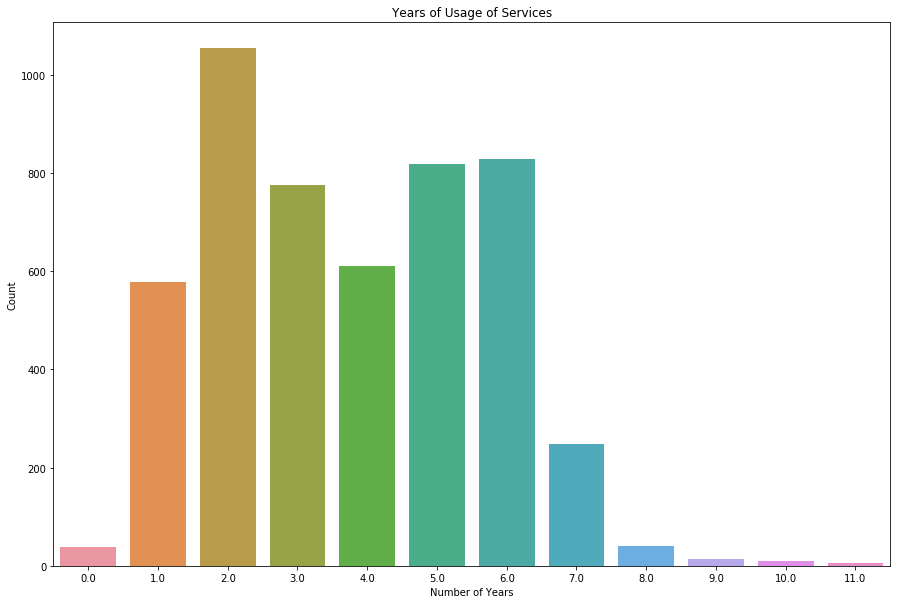

In [905]:
#Rounding the difference in years so that they could be easily analysed and understood and used as features in mchine learning
data['Difference_years']=data['Difference_years'].round(decimals=0)
plt.figure(figsize=(15,10))
sns.countplot(data['Difference_years'])
plt.ylabel("Count")
plt.xlabel("Number of Years")
plt.title("Years of Usage of Services")
plt.show()

### Most of the customers bought these services 2 to 6 years back with the maximuim time since purchase to be 11 years and the mode to be 2 years i.e. most of the customers have been using these services since 2 years

## Testing for P1 Ratio

## 2.Data Engineering

#### We chose values above 45 percentile i.e. having P_Ratios greater than 0.58(approx) to be considered as '1' and values below that to be considered as '0'

In [906]:
#Choosing the columns to be used as the features 
P1_data=data[["Var1","Var2","Var3","P1_Ratio","P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","CustSize","Segment","Difference_years"]]
#Converting Var1, Var2 and Var3 into numbers for use in  machine learning models
#Setting value as 1 if a True and 0 if False
P1_data["Var1_new"]=[1 if x==True else 0 for x in P1_data["Var1"]]
P1_data["Var2_new"]=[1 if x==True else 0 for x in P1_data["Var2"]]
P1_data["Var3_new"]=[1 if x==True else 0 for x in P1_data["Var3"]]
P1_data.drop(columns=["Var1","Var2","Var3"],inplace=True)
P1_data

,P1_Ratio,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,...,P9,P71,P81,P91,CustSize,Segment,Difference_years,Var1_new,Var2_new,Var3_new
0,0.742353,0.460392,0.718140,0.351200,0.008627,0.87552,1893,1174,1917.0,291.0,...,2084.0,44.0,1544.0,22.0,1K+,S_5,2.0,1,0,0
1,0.609234,0.002651,0.000113,0.025484,0.075343,0.77961,20452,89,20482.0,7678.0,...,126.0,74.0,3.0,126.0,10K+,S_3,6.0,1,1,0
2,0.771869,0.057143,0.028571,0.300000,0.028571,0.07483,8665,20,8668.0,28.0,...,218.0,5.0,10.0,10.0,10K+,S_3,6.0,1,0,0
3,0.877647,0.066667,0.135714,0.223967,0.000000,0.43330,2984,84,2990.0,6.0,...,1197.0,25.0,171.0,0.0,1K+,S_3,1.0,1,0,0
4,0.661285,0.007608,0.001467,0.005041,0.000092,0.62645,8520,83,8528.0,398.0,...,759.0,9.0,16.0,1.0,10K+,S_3,5.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5014,0.779210,0.502673,0.252166,0.159631,0.002949,0.06249,6409,2727,6441.0,827.0,...,5464.0,201.0,1368.0,16.0,1K+,S_4,2.0,1,1,0
5015,0.844230,0.000615,0.092539,0.805903,0.000512,0.36173,8238,6,8615.0,14.0,...,9038.0,220.0,30.0,5.0,1K+,S_4,1.0,1,1,0
5016,0.871611,0.822006,0.487660,0.051064,0.073070,0.48464,7169,6761,7309.0,2456.0,...,8162.0,37.0,4011.0,601.0,1K+,S_5,6.0,1,1,0
5017,0.043484,0.024581,0.067333,0.399467,0.000129,0.45853,674,381,3776.0,159.0,...,7110.0,91.0,606.0,2.0,10K+,S_2,3.0,1,0,0


In [907]:
#Dropping percentiles which are below 0.1( approximately 500 data values) 
#This is beacuse these are considered to be customers with very low potential of change and would only lead to more noise in the model.
y=P1_data["P1_Ratio"].quantile(0.1)
P1_data.drop(P1_data[P1_data["P1_Ratio"]<=y].index,inplace=True)
P1_data.reset_index(drop=True,inplace=True)
#Classifying the values into 0 and 1 on the basis of cutoff values for the P_Ratios
P1_data["Actual"]=[1 if x >0.58 else 0 for x in P1_data["P1_Ratio"]]
P1_data.head()

,P1_Ratio,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,...,P71,P81,P91,CustSize,Segment,Difference_years,Var1_new,Var2_new,Var3_new,Actual
0,0.742353,0.460392,0.718140,0.351200,0.008627,0.87552,1893,1174,1917.0,291.0,...,44.0,1544.0,22.0,1K+,S_5,2.0,1,0,0,1
1,0.609234,0.002651,0.000113,0.025484,0.075343,0.77961,20452,89,20482.0,7678.0,...,74.0,3.0,126.0,10K+,S_3,6.0,1,1,0,1
2,0.771869,0.057143,0.028571,0.300000,0.028571,0.07483,8665,20,8668.0,28.0,...,5.0,10.0,10.0,10K+,S_3,6.0,1,0,0,1
3,0.877647,0.066667,0.135714,0.223967,0.000000,0.43330,2984,84,2990.0,6.0,...,25.0,171.0,0.0,1K+,S_3,1.0,1,0,0,1
4,0.661285,0.007608,0.001467,0.005041,0.000092,0.62645,8520,83,8528.0,398.0,...,9.0,16.0,1.0,10K+,S_3,5.0,1,0,0,1


In [908]:
#So there are 1772 observations in '0' category and 2745 observations in '1' category.
P1_data["Actual"].value_counts()

1    2745
0    1772
Name: Actual, dtype: int64

#### So there are 1772 values which are below the cutoff value for the P1_Ratio . 

In [909]:
#Converting categorical variables to dummy variables(one-hot encoding) for prediction
categorial_cols = ['Segment','CustSize']
P1_data= pd.get_dummies(P1_data, columns = categorial_cols, drop_first = True)
P1_data.head()

,P1_Ratio,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,...,Var2_new,Var3_new,Actual,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100
0,0.742353,0.460392,0.718140,0.351200,0.008627,0.87552,1893,1174,1917.0,291.0,...,0,0,1,0,0,0,1,1,0,0
1,0.609234,0.002651,0.000113,0.025484,0.075343,0.77961,20452,89,20482.0,7678.0,...,1,0,1,0,1,0,0,0,0,0
2,0.771869,0.057143,0.028571,0.300000,0.028571,0.07483,8665,20,8668.0,28.0,...,0,0,1,0,1,0,0,0,0,0
3,0.877647,0.066667,0.135714,0.223967,0.000000,0.43330,2984,84,2990.0,6.0,...,0,0,1,0,1,0,0,1,0,0
4,0.661285,0.007608,0.001467,0.005041,0.000092,0.62645,8520,83,8528.0,398.0,...,0,0,1,0,1,0,0,0,0,0


#### So we get new variables in place of Segment like Segment_S_2, Segment_S_3, etc. which have value 1 if the observation had that segment type and value 0 if the observation was of a different segment type. We do this so that they can be used as features in the machine learnig algorithms.

In [910]:
#Setting the label values i.e. the target variable which is the P1_Actual
P1_labels=P1_data["Actual"]
#Setting the feature values (all variables except P1_Actual and P1_Ratio since it had already been used in classification of P1_Actual)
P1_predictors=P1_data.drop(["Actual","P1_Ratio"],axis=1)
P1_predictors.head()

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var1_new,Var2_new,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100
0,0.460392,0.718140,0.351200,0.008627,0.87552,1893,1174,1917.0,291.0,2550.0,...,1,0,0,0,0,0,1,1,0,0
1,0.002651,0.000113,0.025484,0.075343,0.77961,20452,89,20482.0,7678.0,40070.0,...,1,1,0,0,1,0,0,0,0,0
2,0.057143,0.028571,0.300000,0.028571,0.07483,8665,20,8668.0,28.0,11226.0,...,1,0,0,0,1,0,0,0,0,0
3,0.066667,0.135714,0.223967,0.000000,0.43330,2984,84,2990.0,6.0,3400.0,...,1,0,0,0,1,0,0,1,0,0
4,0.007608,0.001467,0.005041,0.000092,0.62645,8520,83,8528.0,398.0,12884.0,...,1,0,0,0,1,0,0,0,0,0


In [911]:
P1_predictors.shape

(4517, 34)

#### So there are 34 columns which willl be used as the features in classification of P1_Actual values into 0 and 1

## 3. Classification Analysis

### Logistic Regression

#### First Iteration

In [912]:
#Random Split of data
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(P1_predictors, P1_labels, test_size=0.3, random_state=1)
#Creating copy of test and train data 
X_train_original=X_train.copy()
X_test_original=X_test.copy()

In [913]:
#Scaling the numerical data using min-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.fit_transform(X_train[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.transform(X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test.head()

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var1_new,Var2_new,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100
1038,0.421410,0.895901,1.000000,0.643173,0.195663,0.016598,0.018494,0.016829,0.006162,0.003725,...,1,0,0,0,0,0,1,1,0,0
4210,0.699084,0.030111,0.783324,0.000000,0.330063,0.174109,0.905382,0.436519,0.000000,0.109962,...,1,1,0,0,0,0,1,0,0,0
1073,0.006203,0.026250,0.380441,0.000185,0.960391,0.024387,0.000867,0.024750,0.000227,0.011863,...,1,1,0,0,0,1,0,0,0,0
3979,1.000000,0.000325,0.086699,0.003447,0.175009,0.079345,0.207030,0.081429,0.004096,0.016889,...,1,1,0,0,0,0,1,0,0,0
222,0.054817,0.188551,0.592673,0.014925,0.975565,0.011326,0.002614,0.011721,0.006630,0.004044,...,1,1,0,0,0,1,0,1,0,0


In [914]:
#Function for easy visualization of confusion matrices
from sklearn import metrics #import confusion_matrix 
def confusionmatrix(y_test,y_predict,x='name of model'):
    cm=metrics.confusion_matrix(y_test,y_predict)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm,annot=True,cbar=False, fmt='g')
    cm1 = pd.DataFrame(cm.reshape((1,4)), columns=['TN', 'FP', 'FN', 'TP'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(x) 
    return [ plt.show()]

0.8185840707964602


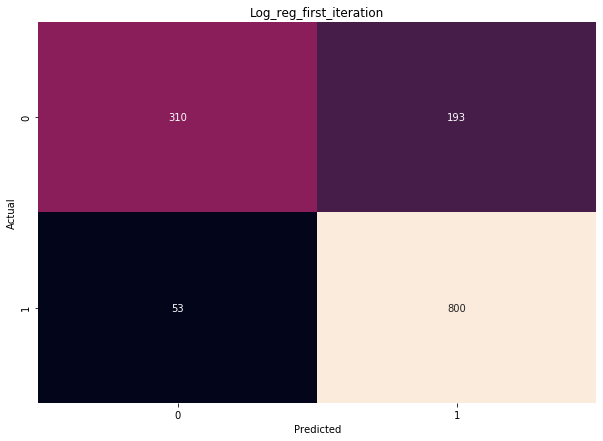

[None]

In [915]:
#Applying  Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logreg_1= LogisticRegression()
logreg_1.fit(X_train,y_train)
P1_logreg= pd.DataFrame(logreg_1.predict(X_test))
print(logreg_1.score(X_test,y_test))
# visualization 
confusionmatrix(y_test,P1_logreg,x='Log_reg_first_iteration') 

### This shows that there are 193 values which were 0 in the given data but are predicted as 1 i.e. these are the potential customers

In [916]:
#Testing set dataframe for first iteration
P1_out_1= X_test_original.reset_index()
P1_out_1["Actual"] = y_test.reset_index()["Actual"]
P1_out_1["Logistic_Reg_I1"] = P1_logreg.reset_index()[0]
P1_out_1.drop(["index"],axis=1,inplace=True)
P1_out_1

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100,Actual,Logistic_Reg_I1
0,0.421410,0.895901,1.000000,0.643173,0.19579,3338,1429,3388.0,2332.0,3396.0,...,0,0,0,0,1,1,0,0,1,1
1,0.699084,0.030111,0.783324,0.000000,0.33016,35005,69958,87853.0,0.0,100071.0,...,0,0,0,0,1,0,0,0,0,1
2,0.006203,0.026250,0.380441,0.000185,0.96035,4904,67,4982.0,86.0,10801.0,...,0,0,0,1,0,0,0,0,0,1
3,1.000000,0.000325,0.086699,0.003447,0.17514,15953,15997,16389.0,1550.0,15375.0,...,0,0,0,0,1,0,0,0,1,1
4,0.054817,0.188551,0.592673,0.014925,0.97552,2278,202,2360.0,2509.0,3686.0,...,0,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,0.770417,0.278333,0.971250,0.023750,0.34132,2260,1849,2344.0,315.0,2400.0,...,0,0,0,0,1,1,0,0,1,1
1352,0.000342,0.000293,0.000619,0.006294,0.69257,2,21,44.0,54.0,61427.0,...,0,1,0,0,0,0,0,0,0,0
1353,0.130710,0.171127,0.142857,0.000704,0.42975,1539,186,1539.0,364.0,1773.0,...,0,0,1,0,0,1,0,0,1,1
1354,0.050389,0.056506,0.070566,0.017642,0.40268,17365,395,17439.0,4301.0,19983.0,...,0,0,1,0,0,0,0,0,1,1


#### This is the entire test data which was used in the first iteration . We will remove this data and use the training data as the total dataset for the next iteration

#### Second Iteration

In [917]:
#Now we will use the training data as the total data and run the logistic regression on that data
P1_labels=y_train
P1_predictors=X_train_original
P1_predictors.head()

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var1_new,Var2_new,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100
911,0.062089,0.000278,0.089734,0.014584,0.02227,8203,567,8241.0,10069.0,10207.0,...,1,1,0,0,1,0,0,0,0,0
439,0.068637,0.015481,0.056029,0.020786,0.26330,5595,634,5602.0,5299.0,9237.0,...,1,0,0,0,1,0,0,1,0,0
713,0.013820,0.000124,0.024455,1.000000,0.76873,20957,362,20957.0,2735.0,33649.0,...,1,0,0,0,0,1,0,0,0,0
4137,0.013594,0.011851,0.247473,0.000697,0.31912,2394,39,2416.0,1090.0,4069.0,...,1,0,0,0,1,0,0,1,0,0
3825,0.083077,0.002179,0.170000,0.000000,0.37114,1976,648,1982.0,0.0,7800.0,...,1,0,0,0,1,0,0,1,0,0


In [918]:
#Random Split of data
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(P1_predictors, P1_labels, test_size=0.3, random_state=1)

#Creating copy of test and train data
X_test_original_2=X_test.copy()
X_train_original_2=X_train.copy()

#Scaling the numerical data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.fit_transform(X_train[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.transform(X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test.head()

from sklearn.linear_model import LogisticRegression
logreg_2= LogisticRegression()
logreg_2.fit(X_train,y_train)
P1_logreg= pd.DataFrame(logreg_2.predict(X_test))
print(logreg_2.score(X_test,y_test))


0.8314014752370916


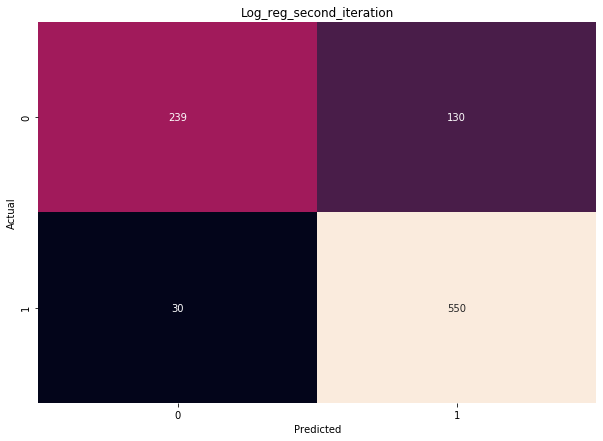

[None]

In [919]:
#visualization
confusionmatrix(y_test,P1_logreg,x='Log_reg_second_iteration')

### This shows that there are 130 more values which are 0 in given data but predicted as 1

In [920]:
#Testing set dataframe for second iteration
P1_out_2 = X_test_original_2.reset_index()
P1_out_2["Actual"] = y_test.reset_index()["Actual"]
P1_out_2["Logistic_Reg_I2"] = P1_logreg.reset_index()[0]
P1_out_2.drop(["index"],axis=1,inplace=True)
P1_out_2.head()

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100,Actual,Logistic_Reg_I2
0,0.013063,0.297047,0.052987,0.000136,0.63364,3447,96,3466.0,597.0,7349.0,...,0,0,0,1,0,1,0,0,0,1
1,0.201818,0.044318,0.625455,0.007727,0.60786,3176,888,3398.0,1439.0,4400.0,...,0,0,0,1,0,1,0,0,1,1
2,0.080000,0.031496,0.380000,0.004000,0.29688,8597,26,8644.0,76.0,14579.0,...,0,0,1,0,0,0,0,0,1,0
3,0.000000,0.148009,0.000656,0.000000,0.27905,2842,0,3796.0,0.0,13486.0,...,0,0,1,0,0,0,0,0,0,0
4,0.068000,0.219200,0.015000,0.000000,0.00475,1552,85,1555.0,157.0,1250.0,...,0,0,0,1,0,1,0,0,1,1


#### This is the entire test data which was used in the second iteration . We will remove this data and use the training data as the total dataset for the next iteration

#### Third Iteration

In [921]:
#We will again use the training data as the total data and run the logistic regression on that data'''
P1_labels=y_train
P1_predictors=X_train_original_2
P1_predictors.head()

#Random Split of data
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(P1_predictors, P1_labels, test_size=0.3, random_state=1)

#Creating copy of test and train data which are not descaled
X_train_original_3=X_train.copy() ## this will be used further in all iteration
X_test_original_3=X_test.copy()

#Scaling the numerical data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.fit_transform(X_train[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.transform(X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test.head()

#Applying model for 3rd iteration
from sklearn.linear_model import LogisticRegression
logreg_3= LogisticRegression()
logreg_3.fit(X_train,y_train)
P1_logreg= pd.DataFrame(logreg_3.predict(X_test))
print(logreg_3.score(X_test,y_test))

0.8057228915662651


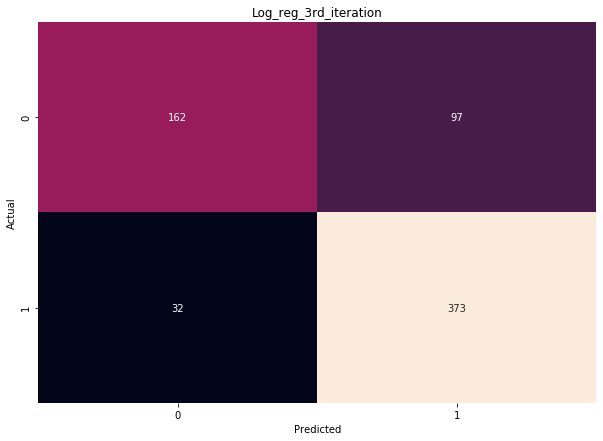

[None]

In [922]:
#visualization
confusionmatrix(y_test,P1_logreg,x='Log_reg_3rd_iteration') 

### This shows that there are 97 more values which are 0 in given data but predicted as 1

In [923]:
#Testing set dataframe for third iteration
P1_out_3 = X_test_original_3.reset_index()
P1_out_3["Actual"] = y_test.reset_index()["Actual"]
P1_out_3["Logistic_Reg_I3"] = P1_logreg.reset_index()[0]
P1_out_3.drop(["index"],axis=1,inplace=True)
P1_out_3.head()

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100,Actual,Logistic_Reg_I3
0,0.739964,0.211143,0.722143,0.001429,0.86715,5745,5677,6081.0,3.0,7672.0,...,0,0,0,0,1,1,0,0,1,1
1,0.129774,0.196610,0.417040,0.084746,0.86541,5216,384,5250.0,820.0,6500.0,...,0,0,1,0,0,1,0,0,1,1
2,0.003738,0.006915,0.001433,0.030278,0.34617,65,60,200.0,1588.0,16061.0,...,0,1,0,0,0,0,0,0,0,0
3,0.236526,0.193787,0.846811,0.000000,0.14190,4404,1242,4501.0,0.0,5251.0,...,0,0,0,1,0,1,0,0,1,1
4,0.001999,0.000064,0.000000,0.028455,0.36733,883,94,937.0,1510.0,47022.0,...,0,1,0,0,0,0,0,0,0,0


#### This is the entire test data which was used in the third iteration.

### Fourth Iteration

#### This time we will use all the data which had 0 as actual value in the original data as the test data and run logistic regression on that data

In [924]:
Test_data=P1_data[P1_data["Actual"]==0]
X_test=Test_data.drop(["Actual","P1_Ratio"],axis=1)
X_test_original_4=X_test.copy()
y_test=Test_data["Actual"]

#Scaling xtest
X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.fit_transform(X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var1_new,Var2_new,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100
9,0.000000,0.000000,0.000400,0.000557,0.657637,0.672218,0.000000,0.658018,0.034959,1.000000,...,1,0,0,1,0,0,0,0,0,0
11,0.004538,0.030000,0.041000,0.000000,0.679411,0.000964,0.000764,0.001001,0.000465,0.014264,...,1,0,0,1,0,0,0,0,0,0
22,0.355429,0.279214,0.349805,0.060000,0.730992,0.060872,0.128797,0.089053,0.046354,0.038024,...,1,0,0,0,0,1,0,0,0,0
24,0.006691,0.031902,0.014624,0.001227,0.826452,0.000812,0.000466,0.001058,0.000581,0.005890,...,1,0,0,1,0,0,0,1,0,0
30,0.043292,0.000000,0.226571,0.000000,0.703983,0.000000,0.004051,0.007996,0.000000,0.007923,...,1,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4496,0.010155,0.006915,0.001869,0.074076,0.895855,0.000494,0.002110,0.001451,0.028421,0.017628,...,1,0,0,1,0,0,0,0,0,0
4499,0.070715,0.038772,0.079594,0.003720,0.967274,0.032229,0.045154,0.031877,0.000262,0.054198,...,1,0,1,1,0,0,0,0,0,0
4501,0.016881,0.000000,0.084110,0.003209,0.435315,0.000049,0.001566,0.002107,0.018461,0.015864,...,1,1,0,1,0,0,0,0,0,0
4507,0.015323,0.046129,0.042097,0.001290,0.602987,0.003634,0.001229,0.003634,0.000013,0.006791,...,1,1,0,1,0,0,0,1,0,0


In [925]:
#Applying model
logreg_1.fit(X_train,y_train)
P1_logreg= pd.DataFrame(logreg_1.predict(X_test))
print(logreg_1.score(X_test,y_test))

0.5976297968397292


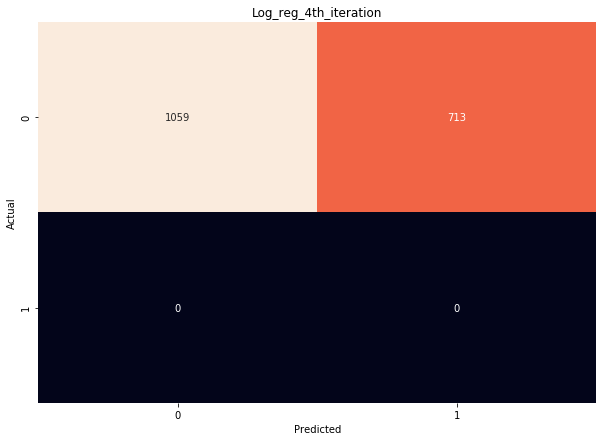

[None]

In [926]:
#visualization
confusionmatrix(y_test,P1_logreg,x='Log_reg_4th_iteration') 

### This shows that 713 values out of original data which were 0 are predicted to be 1. We can see that there are no data with Actual values as '1'. This is beacuse the test data only contained observations which had actual value as '0'

In [927]:
#Testing set dataframe for fourth iteration
P1_out_4 = X_test_original_4.reset_index()
P1_out_4["Actual"] = y_test.reset_index()["Actual"]
P1_out_4["Logistic_Reg_I4"] = P1_logreg.reset_index()[0]
P1_out_4.drop(["index"],axis=1,inplace=True)
P1_out_4

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100,Actual,Logistic_Reg_I4
0,0.000000,0.000000,0.000400,0.000557,0.65581,137432,0,137438.0,13229.0,910000.0,...,0,1,0,0,0,0,0,0,0,0
1,0.004538,0.030000,0.041000,0.000000,0.67752,198,59,210.0,176.0,13000.0,...,0,1,0,0,0,0,0,0,0,0
2,0.355429,0.279214,0.349805,0.060000,0.72895,12446,9952,18601.0,17541.0,34621.0,...,0,0,0,1,0,0,0,0,0,1
3,0.006691,0.031902,0.014624,0.001227,0.82413,167,36,222.0,220.0,5380.0,...,0,1,0,0,0,1,0,0,0,0
4,0.043292,0.000000,0.226571,0.000000,0.70202,1,313,1671.0,0.0,7230.0,...,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,0.010155,0.006915,0.001869,0.074076,0.89333,102,163,304.0,10755.0,16061.0,...,0,1,0,0,0,0,0,0,0,0
1768,0.070715,0.038772,0.079594,0.003720,0.96454,6590,3489,6659.0,99.0,49339.0,...,1,1,0,0,0,0,0,0,0,0
1769,0.016881,0.000000,0.084110,0.003209,0.43414,11,121,441.0,6986.0,14456.0,...,0,1,0,0,0,0,0,0,0,0
1770,0.015323,0.046129,0.042097,0.001290,0.60132,744,95,760.0,5.0,6200.0,...,0,1,0,0,0,1,0,0,0,0


#### This is the testing data set for the fourth iteration in which we tested the model on all the data which had actual values as zero.

In [928]:
#Merging all the four dataframes
P1_out_logreg=pd.merge(P1_out_1,P1_out_2,how="outer",left_on=["Var1_new","Var2_new","Var3_new","P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"],right_on=["Var1_new","Var2_new","Var3_new","P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"])
P1_out_logreg=pd.merge(P1_out_3,P1_out_logreg,how="outer",left_on=["Var1_new","Var2_new","Var3_new","P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"],right_on=["Var1_new","Var2_new","Var3_new","P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"])
P1_out_logreg=pd.merge(P1_out_4,P1_out_logreg,how="outer",left_on=["Var1_new","Var2_new","Var3_new","P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"],right_on=["Var1_new","Var2_new","Var3_new","P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"])
P1_out_logreg=P1_out_logreg[P1_out_logreg["Actual"]==0]
P1_out_logreg

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100,Actual,Logistic_Reg_I4,Logistic_Reg_I3,Logistic_Reg_I1,Logistic_Reg_I2
0,0.000000,0.000000,0.000400,0.000557,0.65581,137432,0,137438.0,13229.0,910000.0,...,0,0,0,0,0,0,0.0,0.0,NaN,NaN
1,0.004538,0.030000,0.041000,0.000000,0.67752,198,59,210.0,176.0,13000.0,...,0,0,0,0,0,0,0.0,NaN,NaN,NaN
2,0.355429,0.279214,0.349805,0.060000,0.72895,12446,9952,18601.0,17541.0,34621.0,...,1,0,0,0,0,0,1.0,1.0,NaN,NaN
3,0.006691,0.031902,0.014624,0.001227,0.82413,167,36,222.0,220.0,5380.0,...,0,0,1,0,0,0,0.0,NaN,NaN,0.0
4,0.043292,0.000000,0.226571,0.000000,0.70202,1,313,1671.0,0.0,7230.0,...,0,0,1,0,0,0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,0.010155,0.006915,0.001869,0.074076,0.89333,102,163,304.0,10755.0,16061.0,...,0,0,0,0,0,0,0.0,0.0,NaN,NaN
1768,0.070715,0.038772,0.079594,0.003720,0.96454,6590,3489,6659.0,99.0,49339.0,...,0,0,0,0,0,0,0.0,NaN,NaN,NaN
1769,0.016881,0.000000,0.084110,0.003209,0.43414,11,121,441.0,6986.0,14456.0,...,0,0,0,0,0,0,0.0,NaN,0.0,NaN
1770,0.015323,0.046129,0.042097,0.001290,0.60132,744,95,760.0,5.0,6200.0,...,0,0,1,0,0,0,0.0,0.0,NaN,NaN


#### So this is the dataframe containing the predictions of the four iterations done using Logistic regression on data which had actual value as 0. This will contain data which has atleast been tested once and at maximuim, twice i.e. if it were present in the first three iterations as part of the test data.

### Decision Tress

#### First iteration

In [929]:
#Setting the label values
P1_labels=P1_data["Actual"]
#Setting the feature values
P1_predictors=P1_data.drop(["Actual","P1_Ratio"],axis=1)
P1_predictors.head()

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var1_new,Var2_new,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100
0,0.460392,0.718140,0.351200,0.008627,0.87552,1893,1174,1917.0,291.0,2550.0,...,1,0,0,0,0,0,1,1,0,0
1,0.002651,0.000113,0.025484,0.075343,0.77961,20452,89,20482.0,7678.0,40070.0,...,1,1,0,0,1,0,0,0,0,0
2,0.057143,0.028571,0.300000,0.028571,0.07483,8665,20,8668.0,28.0,11226.0,...,1,0,0,0,1,0,0,0,0,0
3,0.066667,0.135714,0.223967,0.000000,0.43330,2984,84,2990.0,6.0,3400.0,...,1,0,0,0,1,0,0,1,0,0
4,0.007608,0.001467,0.005041,0.000092,0.62645,8520,83,8528.0,398.0,12884.0,...,1,0,0,0,1,0,0,0,0,0


In [930]:
#Random Split of data
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(P1_predictors, P1_labels, test_size=0.3, random_state=1)
#Creating copy of test and train data 
X_train_original=X_train.copy()
X_test_original=X_test.copy()

In [931]:
#Scaling the numerical data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.fit_transform(X_train[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.transform(X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test.head()

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var1_new,Var2_new,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100
1038,0.421410,0.895901,1.000000,0.643173,0.195663,0.016598,0.018494,0.016829,0.006162,0.003725,...,1,0,0,0,0,0,1,1,0,0
4210,0.699084,0.030111,0.783324,0.000000,0.330063,0.174109,0.905382,0.436519,0.000000,0.109962,...,1,1,0,0,0,0,1,0,0,0
1073,0.006203,0.026250,0.380441,0.000185,0.960391,0.024387,0.000867,0.024750,0.000227,0.011863,...,1,1,0,0,0,1,0,0,0,0
3979,1.000000,0.000325,0.086699,0.003447,0.175009,0.079345,0.207030,0.081429,0.004096,0.016889,...,1,1,0,0,0,0,1,0,0,0
222,0.054817,0.188551,0.592673,0.014925,0.975565,0.011326,0.002614,0.011721,0.006630,0.004044,...,1,1,0,0,0,1,0,1,0,0


0.9476401179941003


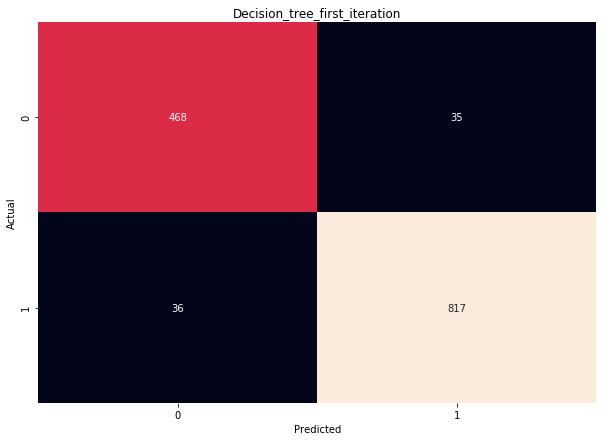

[None]

In [932]:
#Applying Model
from sklearn.tree import DecisionTreeClassifier  
dt_1= DecisionTreeClassifier(criterion='entropy', random_state=0).fit(X_train, y_train) 
P1_dt= pd.DataFrame(dt_1.predict(X_test))
print(dt_1.score(X_test,y_test))
# visualization 
confusionmatrix(y_test,P1_dt,x='Decision_tree_first_iteration') 

### This shows that there are 35 values which were 0 in the given data but are predicted as 1 i.e. these are the potential customers

In [933]:
#Testing set dataframe for first iteration
P1_out_1= X_test_original.reset_index()
P1_out_1["Actual"] = y_test.reset_index()["Actual"]
P1_out_1["Decison_Tree_I1"] = P1_dt.reset_index()[0]
P1_out_1.drop(["index"],axis=1,inplace=True)
P1_out_1.head()

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100,Actual,Decison_Tree_I1
0,0.421410,0.895901,1.000000,0.643173,0.19579,3338,1429,3388.0,2332.0,3396.0,...,0,0,0,0,1,1,0,0,1,1
1,0.699084,0.030111,0.783324,0.000000,0.33016,35005,69958,87853.0,0.0,100071.0,...,0,0,0,0,1,0,0,0,0,0
2,0.006203,0.026250,0.380441,0.000185,0.96035,4904,67,4982.0,86.0,10801.0,...,0,0,0,1,0,0,0,0,0,1
3,1.000000,0.000325,0.086699,0.003447,0.17514,15953,15997,16389.0,1550.0,15375.0,...,0,0,0,0,1,0,0,0,1,1
4,0.054817,0.188551,0.592673,0.014925,0.97552,2278,202,2360.0,2509.0,3686.0,...,0,0,0,1,0,1,0,0,1,1


#### This is the entire test data which was used in the first iteration . We will remove this data and use the training data as the total dataset for the next iteration

#### Second Iteration

In [934]:
#Now we will use the training data as the total data and run the logistic regression on that data
P1_labels=y_train
P1_predictors=X_train_original
P1_predictors.head()

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var1_new,Var2_new,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100
911,0.062089,0.000278,0.089734,0.014584,0.02227,8203,567,8241.0,10069.0,10207.0,...,1,1,0,0,1,0,0,0,0,0
439,0.068637,0.015481,0.056029,0.020786,0.26330,5595,634,5602.0,5299.0,9237.0,...,1,0,0,0,1,0,0,1,0,0
713,0.013820,0.000124,0.024455,1.000000,0.76873,20957,362,20957.0,2735.0,33649.0,...,1,0,0,0,0,1,0,0,0,0
4137,0.013594,0.011851,0.247473,0.000697,0.31912,2394,39,2416.0,1090.0,4069.0,...,1,0,0,0,1,0,0,1,0,0
3825,0.083077,0.002179,0.170000,0.000000,0.37114,1976,648,1982.0,0.0,7800.0,...,1,0,0,0,1,0,0,1,0,0


0.9230769230769231


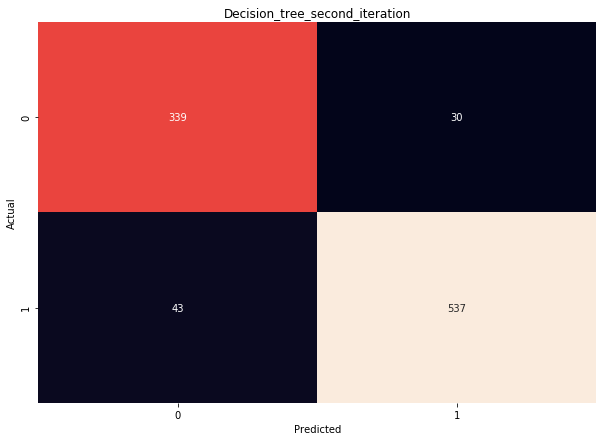

[None]

In [935]:
#Random Split of data
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(P1_predictors, P1_labels, test_size=0.3, random_state=1)

#Creating copy of test and train data 
X_train_original_2=X_train.copy()
X_test_original_2=X_test.copy()

#Scaling the numerical data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.fit_transform(X_train[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.transform(X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test.head()

#Applying Model
from sklearn.tree import DecisionTreeClassifier  
dt_2= DecisionTreeClassifier(criterion='entropy', random_state=0).fit(X_train, y_train) 
P1_dt= pd.DataFrame(dt_2.predict(X_test))
print(dt_2.score(X_test,y_test))
# visualization 
confusionmatrix(y_test,P1_dt,x='Decision_tree_second_iteration') 

### This shows that there are 30 values which were 0 in the given data but are predicted as 1 i.e. these are the potential customers

In [936]:
#Testing set dataframe for second iteration
P1_out_2 = X_test_original_2.reset_index()
P1_out_2["Actual"] = y_test.reset_index()["Actual"]
P1_out_2["Decison_Tree_I2"] = P1_dt.reset_index()[0]
P1_out_2.drop(["index"],axis=1,inplace=True)
P1_out_2.head()

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100,Actual,Decison_Tree_I2
0,0.013063,0.297047,0.052987,0.000136,0.63364,3447,96,3466.0,597.0,7349.0,...,0,0,0,1,0,1,0,0,0,0
1,0.201818,0.044318,0.625455,0.007727,0.60786,3176,888,3398.0,1439.0,4400.0,...,0,0,0,1,0,1,0,0,1,1
2,0.080000,0.031496,0.380000,0.004000,0.29688,8597,26,8644.0,76.0,14579.0,...,0,0,1,0,0,0,0,0,1,0
3,0.000000,0.148009,0.000656,0.000000,0.27905,2842,0,3796.0,0.0,13486.0,...,0,0,1,0,0,0,0,0,0,0
4,0.068000,0.219200,0.015000,0.000000,0.00475,1552,85,1555.0,157.0,1250.0,...,0,0,0,1,0,1,0,0,1,1


#### This is the entire test data which was used in the second iteration . We will remove this data and use the training data as the total dataset for the next iteration

#### Third Iteration

In [937]:
#Now we will again use the training data as the total data and run the logistic regression on that data
P1_labels=y_train
P1_predictors=X_train_original_2
P1_predictors.head()

#Random Split of data
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(P1_predictors, P1_labels, test_size=0.3, random_state=1)

#Creating copy of test and train data 
X_train_original_3=X_train.copy()
X_test_original_3=X_test.copy()

#Scaling the numerical data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.fit_transform(X_train[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.transform(X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test.head()

#Applying Model
from sklearn.tree import DecisionTreeClassifier  
dt_3= DecisionTreeClassifier(criterion='entropy', random_state=0).fit(X_train, y_train) 
P1_dt= pd.DataFrame(dt_3.predict(X_test))
print(dt_3.score(X_test,y_test))

0.9322289156626506


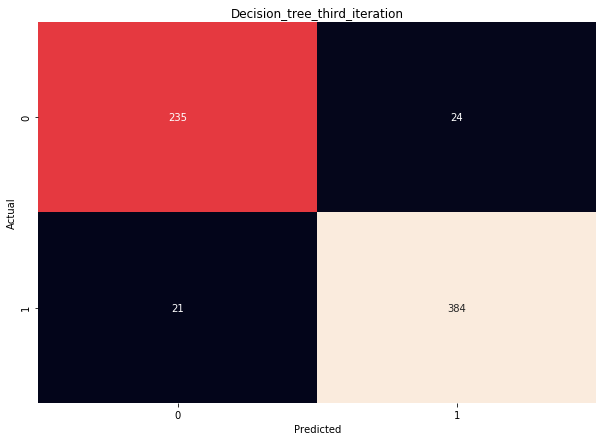

[None]

In [938]:
# visualization 
confusionmatrix(y_test,P1_dt,x='Decision_tree_third_iteration') 

### This shows that there are 24 values which were 0 in the given data but are predicted as 1 i.e. these are the potential customers

In [939]:
#Testing set dataframe for third iteration
P1_out_3 = X_test_original_3.reset_index()
P1_out_3["Actual"] = y_test.reset_index()["Actual"]
P1_out_3["Decison_Tree_I3"] = P1_dt.reset_index()[0]
P1_out_3.drop(["index"],axis=1,inplace=True)
P1_out_3

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100,Actual,Decison_Tree_I3
0,0.739964,0.211143,0.722143,0.001429,0.86715,5745,5677,6081.0,3.0,7672.0,...,0,0,0,0,1,1,0,0,1,1
1,0.129774,0.196610,0.417040,0.084746,0.86541,5216,384,5250.0,820.0,6500.0,...,0,0,1,0,0,1,0,0,1,1
2,0.003738,0.006915,0.001433,0.030278,0.34617,65,60,200.0,1588.0,16061.0,...,0,1,0,0,0,0,0,0,0,0
3,0.236526,0.193787,0.846811,0.000000,0.14190,4404,1242,4501.0,0.0,5251.0,...,0,0,0,1,0,1,0,0,1,1
4,0.001999,0.000064,0.000000,0.028455,0.36733,883,94,937.0,1510.0,47022.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,0.009285,0.000000,0.892447,0.242927,0.50186,3104,91,8641.0,9696.0,9803.0,...,0,0,0,1,0,1,0,0,0,0
660,0.062410,0.462671,0.329531,0.008664,0.84418,5312,433,5409.0,1089.0,7988.0,...,0,0,0,1,0,1,0,0,1,0
661,0.040757,0.004137,0.002228,0.008593,0.65307,8030,140,8035.0,377.0,16863.0,...,0,0,1,0,0,0,0,0,0,0
662,0.011667,0.216923,0.116364,0.000000,0.63259,3179,7,3182.0,4.0,3900.0,...,0,0,1,0,0,1,0,0,1,1


#### This is the entire test data which was used in the third iteration . 

### Fourth Iteration

#### This time we will use all the data which had 0 as actual value in the original data as the test data and run Decision Tree Classifier on that data

In [940]:
Test_data=P1_data[P1_data["Actual"]==0]
X_test=Test_data.drop(["Actual","P1_Ratio"],axis=1)
X_test_original_4=X_test.copy()
y_test=Test_data["Actual"]

#Scaling xtest
X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.fit_transform(X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var1_new,Var2_new,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100
9,0.000000,0.000000,0.000400,0.000557,0.657637,0.672218,0.000000,0.658018,0.034959,1.000000,...,1,0,0,1,0,0,0,0,0,0
11,0.004538,0.030000,0.041000,0.000000,0.679411,0.000964,0.000764,0.001001,0.000465,0.014264,...,1,0,0,1,0,0,0,0,0,0
22,0.355429,0.279214,0.349805,0.060000,0.730992,0.060872,0.128797,0.089053,0.046354,0.038024,...,1,0,0,0,0,1,0,0,0,0
24,0.006691,0.031902,0.014624,0.001227,0.826452,0.000812,0.000466,0.001058,0.000581,0.005890,...,1,0,0,1,0,0,0,1,0,0
30,0.043292,0.000000,0.226571,0.000000,0.703983,0.000000,0.004051,0.007996,0.000000,0.007923,...,1,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4496,0.010155,0.006915,0.001869,0.074076,0.895855,0.000494,0.002110,0.001451,0.028421,0.017628,...,1,0,0,1,0,0,0,0,0,0
4499,0.070715,0.038772,0.079594,0.003720,0.967274,0.032229,0.045154,0.031877,0.000262,0.054198,...,1,0,1,1,0,0,0,0,0,0
4501,0.016881,0.000000,0.084110,0.003209,0.435315,0.000049,0.001566,0.002107,0.018461,0.015864,...,1,1,0,1,0,0,0,0,0,0
4507,0.015323,0.046129,0.042097,0.001290,0.602987,0.003634,0.001229,0.003634,0.000013,0.006791,...,1,1,0,1,0,0,0,1,0,0


In [941]:
#Applying Model using decision tree classifier from first iteration  
dt_1.fit(X_train, y_train) 
P1_dt= pd.DataFrame(dt_1.predict(X_test))
print(dt_1.score(X_test,y_test))

0.7432279909706546


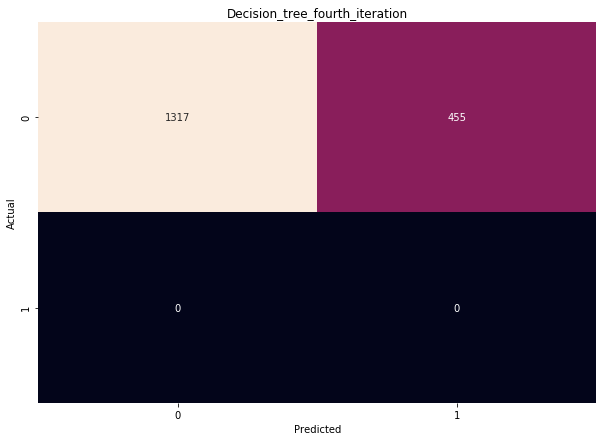

[None]

In [942]:
# visualization 
confusionmatrix(y_test,P1_dt,x='Decision_tree_fourth_iteration') 

### This shows that 455 values out of original data which were 0 are predicted to be 1.We can see that there are no data with Actual values as '1'. This is beacuse the test data only contained observations which had actual value as '0'

In [943]:
#Testing set dataframe for fourth iteration
P1_out_4 = X_test_original_4.reset_index()
P1_out_4["Actual"] = y_test.reset_index()["Actual"]
P1_out_4["Decison_Tree_I4"] = P1_dt.reset_index()[0]
P1_out_4.drop(["index"],axis=1,inplace=True)
P1_out_4

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100,Actual,Decison_Tree_I4
0,0.000000,0.000000,0.000400,0.000557,0.65581,137432,0,137438.0,13229.0,910000.0,...,0,1,0,0,0,0,0,0,0,0
1,0.004538,0.030000,0.041000,0.000000,0.67752,198,59,210.0,176.0,13000.0,...,0,1,0,0,0,0,0,0,0,0
2,0.355429,0.279214,0.349805,0.060000,0.72895,12446,9952,18601.0,17541.0,34621.0,...,0,0,0,1,0,0,0,0,0,0
3,0.006691,0.031902,0.014624,0.001227,0.82413,167,36,222.0,220.0,5380.0,...,0,1,0,0,0,1,0,0,0,0
4,0.043292,0.000000,0.226571,0.000000,0.70202,1,313,1671.0,0.0,7230.0,...,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,0.010155,0.006915,0.001869,0.074076,0.89333,102,163,304.0,10755.0,16061.0,...,0,1,0,0,0,0,0,0,0,0
1768,0.070715,0.038772,0.079594,0.003720,0.96454,6590,3489,6659.0,99.0,49339.0,...,1,1,0,0,0,0,0,0,0,0
1769,0.016881,0.000000,0.084110,0.003209,0.43414,11,121,441.0,6986.0,14456.0,...,0,1,0,0,0,0,0,0,0,0
1770,0.015323,0.046129,0.042097,0.001290,0.60132,744,95,760.0,5.0,6200.0,...,0,1,0,0,0,1,0,0,0,0


#### This is the entire test data which was used in the fourth iteration .

In [944]:
#Merging all the four dataframes
P1_out_dec_tree=pd.merge(P1_out_1,P1_out_2,how="outer",left_on=["Var1_new","Var2_new","Var3_new","P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"],right_on=["Var1_new","Var2_new","Var3_new","P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"])
P1_out_dec_tree=pd.merge(P1_out_3,P1_out_dec_tree,how="outer",left_on=["Var1_new","Var2_new","Var3_new","P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"],right_on=["Var1_new","Var2_new","Var3_new","P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"])
P1_out_dec_tree=pd.merge(P1_out_4,P1_out_dec_tree,how="outer",left_on=["Var1_new","Var2_new","Var3_new","P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"],right_on=["Var1_new","Var2_new","Var3_new","P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"])
P1_out_dec_tree=P1_out_dec_tree[P1_out_dec_tree["Actual"]==0]
P1_out_dec_tree

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100,Actual,Decison_Tree_I4,Decison_Tree_I3,Decison_Tree_I1,Decison_Tree_I2
0,0.000000,0.000000,0.000400,0.000557,0.65581,137432,0,137438.0,13229.0,910000.0,...,0,0,0,0,0,0,0.0,0.0,NaN,NaN
1,0.004538,0.030000,0.041000,0.000000,0.67752,198,59,210.0,176.0,13000.0,...,0,0,0,0,0,0,0.0,NaN,NaN,NaN
2,0.355429,0.279214,0.349805,0.060000,0.72895,12446,9952,18601.0,17541.0,34621.0,...,1,0,0,0,0,0,0.0,0.0,NaN,NaN
3,0.006691,0.031902,0.014624,0.001227,0.82413,167,36,222.0,220.0,5380.0,...,0,0,1,0,0,0,0.0,NaN,NaN,0.0
4,0.043292,0.000000,0.226571,0.000000,0.70202,1,313,1671.0,0.0,7230.0,...,0,0,1,0,0,0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,0.010155,0.006915,0.001869,0.074076,0.89333,102,163,304.0,10755.0,16061.0,...,0,0,0,0,0,0,0.0,0.0,NaN,NaN
1768,0.070715,0.038772,0.079594,0.003720,0.96454,6590,3489,6659.0,99.0,49339.0,...,0,0,0,0,0,0,0.0,NaN,NaN,NaN
1769,0.016881,0.000000,0.084110,0.003209,0.43414,11,121,441.0,6986.0,14456.0,...,0,0,0,0,0,0,0.0,NaN,0.0,NaN
1770,0.015323,0.046129,0.042097,0.001290,0.60132,744,95,760.0,5.0,6200.0,...,0,0,1,0,0,0,0.0,0.0,NaN,NaN


#### So this is the daframe containing the predictions of the four iterations done using Decision Trees on the data which had actual value as 0.This will contain data which has atleast been tested once and at maximuim ,twice i.e. if it were present in the first three iterations as part of the test data

# Random Forest

### First Iteration

In [945]:
#Setting the label values
P1_labels=P1_data["Actual"]
#Setting the feature values
P1_predictors=P1_data.drop(["Actual","P1_Ratio"],axis=1)
P1_predictors.head()

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var1_new,Var2_new,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100
0,0.460392,0.718140,0.351200,0.008627,0.87552,1893,1174,1917.0,291.0,2550.0,...,1,0,0,0,0,0,1,1,0,0
1,0.002651,0.000113,0.025484,0.075343,0.77961,20452,89,20482.0,7678.0,40070.0,...,1,1,0,0,1,0,0,0,0,0
2,0.057143,0.028571,0.300000,0.028571,0.07483,8665,20,8668.0,28.0,11226.0,...,1,0,0,0,1,0,0,0,0,0
3,0.066667,0.135714,0.223967,0.000000,0.43330,2984,84,2990.0,6.0,3400.0,...,1,0,0,0,1,0,0,1,0,0
4,0.007608,0.001467,0.005041,0.000092,0.62645,8520,83,8528.0,398.0,12884.0,...,1,0,0,0,1,0,0,0,0,0


In [946]:
#Random Split of data
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(P1_predictors, P1_labels, test_size=0.3, random_state=1)
#Creating copy of test and train data 
X_train_original=X_train.copy()
X_test_original=X_test.copy()

In [947]:
#Scaling the numerical data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.fit_transform(X_train[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.transform(X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test.head()

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var1_new,Var2_new,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100
1038,0.421410,0.895901,1.000000,0.643173,0.195663,0.016598,0.018494,0.016829,0.006162,0.003725,...,1,0,0,0,0,0,1,1,0,0
4210,0.699084,0.030111,0.783324,0.000000,0.330063,0.174109,0.905382,0.436519,0.000000,0.109962,...,1,1,0,0,0,0,1,0,0,0
1073,0.006203,0.026250,0.380441,0.000185,0.960391,0.024387,0.000867,0.024750,0.000227,0.011863,...,1,1,0,0,0,1,0,0,0,0
3979,1.000000,0.000325,0.086699,0.003447,0.175009,0.079345,0.207030,0.081429,0.004096,0.016889,...,1,1,0,0,0,0,1,0,0,0
222,0.054817,0.188551,0.592673,0.014925,0.975565,0.011326,0.002614,0.011721,0.006630,0.004044,...,1,1,0,0,0,1,0,1,0,0


0.9638643067846607


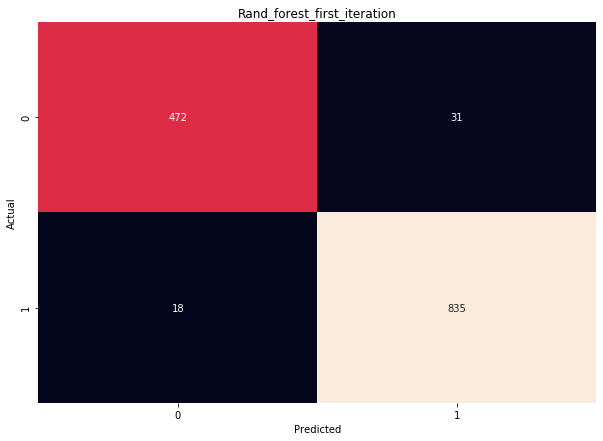

[None]

In [948]:
#Applying Model
from sklearn.ensemble import RandomForestClassifier  
random_forest_1=RandomForestClassifier(random_state=0)
random_forest_1.fit(X_train, y_train)
P1_random_forest= pd.DataFrame(random_forest_1.predict(X_test))
print(random_forest_1.score(X_test,y_test))
# visualization 
confusionmatrix(y_test,P1_random_forest,x='Rand_forest_first_iteration') 

### This shows that there are 31 values which were 0 in the given data but are predicted as 1 i.e. these are the potential customer

In [949]:
#Testing set dataframe for first iteration
P1_out_1= X_test_original.reset_index()
P1_out_1["Actual"] = y_test.reset_index()["Actual"]
P1_out_1["Random_Forest_I1"] = P1_random_forest.reset_index()[0]
P1_out_1.drop(["index"],axis=1,inplace=True)
P1_out_1.head()

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100,Actual,Random_Forest_I1
0,0.421410,0.895901,1.000000,0.643173,0.19579,3338,1429,3388.0,2332.0,3396.0,...,0,0,0,0,1,1,0,0,1,1
1,0.699084,0.030111,0.783324,0.000000,0.33016,35005,69958,87853.0,0.0,100071.0,...,0,0,0,0,1,0,0,0,0,0
2,0.006203,0.026250,0.380441,0.000185,0.96035,4904,67,4982.0,86.0,10801.0,...,0,0,0,1,0,0,0,0,0,1
3,1.000000,0.000325,0.086699,0.003447,0.17514,15953,15997,16389.0,1550.0,15375.0,...,0,0,0,0,1,0,0,0,1,1
4,0.054817,0.188551,0.592673,0.014925,0.97552,2278,202,2360.0,2509.0,3686.0,...,0,0,0,1,0,1,0,0,1,1


#### This is the entire test data which was used in the first iteration . We will remove this data and use the training data as the total dataset for the next iteration

### Second Iteration

In [950]:
#Now we will again use the training data as the total data and run the random forest on that data
P1_labels=y_train
P1_predictors=X_train_original
P1_predictors.head()

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var1_new,Var2_new,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100
911,0.062089,0.000278,0.089734,0.014584,0.02227,8203,567,8241.0,10069.0,10207.0,...,1,1,0,0,1,0,0,0,0,0
439,0.068637,0.015481,0.056029,0.020786,0.26330,5595,634,5602.0,5299.0,9237.0,...,1,0,0,0,1,0,0,1,0,0
713,0.013820,0.000124,0.024455,1.000000,0.76873,20957,362,20957.0,2735.0,33649.0,...,1,0,0,0,0,1,0,0,0,0
4137,0.013594,0.011851,0.247473,0.000697,0.31912,2394,39,2416.0,1090.0,4069.0,...,1,0,0,0,1,0,0,1,0,0
3825,0.083077,0.002179,0.170000,0.000000,0.37114,1976,648,1982.0,0.0,7800.0,...,1,0,0,0,1,0,0,1,0,0


In [951]:
#Random Split of data
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(P1_predictors, P1_labels, test_size=0.3, random_state=1)

#Creating copy of test and train data 
X_train_original_2=X_train.copy()
X_test_original_2=X_test.copy()

#Scaling the numerical data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.fit_transform(X_train[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.transform(X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test.head()

#Applying Model
from sklearn.ensemble import RandomForestClassifier  
random_forest_2=RandomForestClassifier(random_state=0)
random_forest_2.fit(X_train, y_train)
P1_random_forest= pd.DataFrame(random_forest_2.predict(X_test))
print(random_forest_2.score(X_test,y_test))

0.9599578503688093


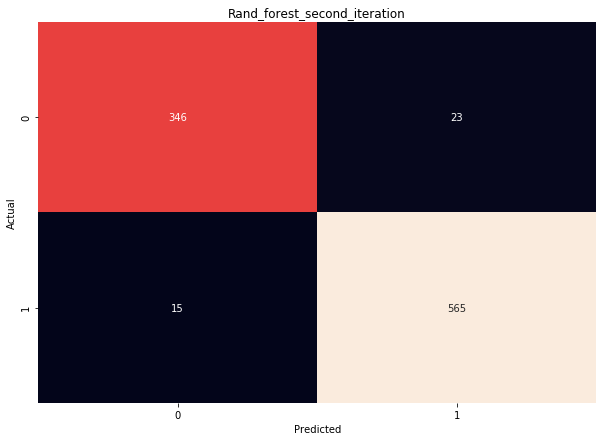

[None]

In [952]:
# visualization 
confusionmatrix(y_test,P1_random_forest,x='Rand_forest_second_iteration') 

### This shows that there are 23 more values which are 0 in given data but predicted as 1

In [953]:
#Testing set dataframe for second iteration
P1_out_2 = X_test_original_2.reset_index()
P1_out_2["Actual"] = y_test.reset_index()["Actual"]
P1_out_2["Random_Forest_I2"] = P1_random_forest.reset_index()[0]
P1_out_2.drop(["index"],axis=1,inplace=True)
P1_out_2.head()

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100,Actual,Random_Forest_I2
0,0.013063,0.297047,0.052987,0.000136,0.63364,3447,96,3466.0,597.0,7349.0,...,0,0,0,1,0,1,0,0,0,1
1,0.201818,0.044318,0.625455,0.007727,0.60786,3176,888,3398.0,1439.0,4400.0,...,0,0,0,1,0,1,0,0,1,1
2,0.080000,0.031496,0.380000,0.004000,0.29688,8597,26,8644.0,76.0,14579.0,...,0,0,1,0,0,0,0,0,1,0
3,0.000000,0.148009,0.000656,0.000000,0.27905,2842,0,3796.0,0.0,13486.0,...,0,0,1,0,0,0,0,0,0,0
4,0.068000,0.219200,0.015000,0.000000,0.00475,1552,85,1555.0,157.0,1250.0,...,0,0,0,1,0,1,0,0,1,1


#### This is the entire test data which was used in the second iteration . We will remove this data and use the training data as the total dataset for the next iteration

### Third Iteration

In [954]:
#Now we will again use the training data as the total data and run the random forest on that data
P1_labels=y_train
P1_predictors=X_train_original_2
P1_predictors.head()

#Random Split of data
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(P1_predictors, P1_labels, test_size=0.3, random_state=1)

#Creating copy of test and train data 
X_train_original_3=X_train.copy()
X_test_original_3=X_test.copy()

#Scaling the numerical data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.fit_transform(X_train[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.transform(X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test.head()

#Applying Model
from sklearn.ensemble import RandomForestClassifier  
random_forest_3=RandomForestClassifier(random_state=0)
random_forest_3.fit(X_train, y_train)
P1_random_forest= pd.DataFrame(random_forest_3.predict(X_test))
print(random_forest_3.score(X_test,y_test))

0.947289156626506


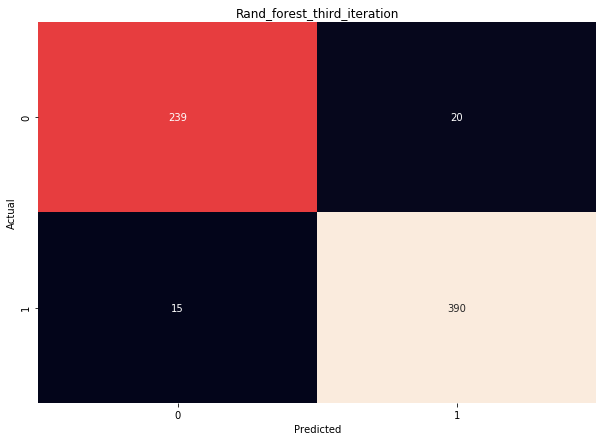

[None]

In [955]:
# visualization 
confusionmatrix(y_test,P1_random_forest,x='Rand_forest_third_iteration') 

### This shows that there are 20 more values which are 0 in given data but predicted as 1

In [956]:
#Testing set dataframe for third iteration
P1_out_3 = X_test_original_3.reset_index()
P1_out_3["Actual"] = y_test.reset_index()["Actual"]
P1_out_3["Random_Forest_I3"] = P1_random_forest.reset_index()[0]
P1_out_3.drop(["index"],axis=1,inplace=True)
P1_out_3.head()

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100,Actual,Random_Forest_I3
0,0.739964,0.211143,0.722143,0.001429,0.86715,5745,5677,6081.0,3.0,7672.0,...,0,0,0,0,1,1,0,0,1,1
1,0.129774,0.196610,0.417040,0.084746,0.86541,5216,384,5250.0,820.0,6500.0,...,0,0,1,0,0,1,0,0,1,1
2,0.003738,0.006915,0.001433,0.030278,0.34617,65,60,200.0,1588.0,16061.0,...,0,1,0,0,0,0,0,0,0,0
3,0.236526,0.193787,0.846811,0.000000,0.14190,4404,1242,4501.0,0.0,5251.0,...,0,0,0,1,0,1,0,0,1,1
4,0.001999,0.000064,0.000000,0.028455,0.36733,883,94,937.0,1510.0,47022.0,...,0,1,0,0,0,0,0,0,0,0


#### This is the entire test data which was used in the third iteration .

### Fourth Iteration

#### This time we will use all the data which had 0 as actual value in the original data as the test data and run random forest on that data

In [957]:
Test_data=P1_data[P1_data["Actual"]==0]
X_test=Test_data.drop(["Actual","P1_Ratio"],axis=1)
X_test_original_4=X_test.copy()
y_test=Test_data["Actual"]

#Scaling xtest
X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.fit_transform(X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var1_new,Var2_new,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100
9,0.000000,0.000000,0.000400,0.000557,0.657637,0.672218,0.000000,0.658018,0.034959,1.000000,...,1,0,0,1,0,0,0,0,0,0
11,0.004538,0.030000,0.041000,0.000000,0.679411,0.000964,0.000764,0.001001,0.000465,0.014264,...,1,0,0,1,0,0,0,0,0,0
22,0.355429,0.279214,0.349805,0.060000,0.730992,0.060872,0.128797,0.089053,0.046354,0.038024,...,1,0,0,0,0,1,0,0,0,0
24,0.006691,0.031902,0.014624,0.001227,0.826452,0.000812,0.000466,0.001058,0.000581,0.005890,...,1,0,0,1,0,0,0,1,0,0
30,0.043292,0.000000,0.226571,0.000000,0.703983,0.000000,0.004051,0.007996,0.000000,0.007923,...,1,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4496,0.010155,0.006915,0.001869,0.074076,0.895855,0.000494,0.002110,0.001451,0.028421,0.017628,...,1,0,0,1,0,0,0,0,0,0
4499,0.070715,0.038772,0.079594,0.003720,0.967274,0.032229,0.045154,0.031877,0.000262,0.054198,...,1,0,1,1,0,0,0,0,0,0
4501,0.016881,0.000000,0.084110,0.003209,0.435315,0.000049,0.001566,0.002107,0.018461,0.015864,...,1,1,0,1,0,0,0,0,0,0
4507,0.015323,0.046129,0.042097,0.001290,0.602987,0.003634,0.001229,0.003634,0.000013,0.006791,...,1,1,0,1,0,0,0,1,0,0


In [958]:
#Applying Model using Randonm forest claaisfier from first iteration
random_forest_1.fit(X_train, y_train)
P1_random_forest= pd.DataFrame(random_forest_1.predict(X_test))
print(random_forest_1.score(X_test,y_test))

0.8177200902934537


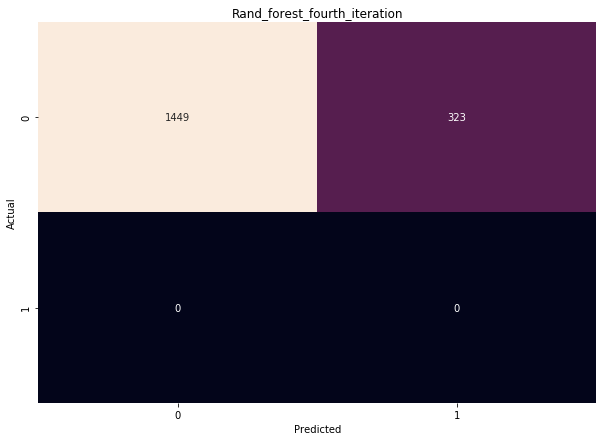

[None]

In [959]:
# visualization 
confusionmatrix(y_test,P1_random_forest,x='Rand_forest_fourth_iteration') 

### This shows that 323 values out of original data which were 0 are predicted to be 1.We can see that there are no data with Actual values as '1'. This is beacuse the test data only contained observations which had actual value as '0'

In [960]:
#Testing set dataframe for fourth iteration
P1_out_4 = X_test_original_4.reset_index()
P1_out_4["Actual"] = y_test.reset_index()["Actual"]
P1_out_4["Random_Forest_I4"] = P1_random_forest.reset_index()[0]
P1_out_4.drop(["index"],axis=1,inplace=True)
P1_out_4

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100,Actual,Random_Forest_I4
0,0.000000,0.000000,0.000400,0.000557,0.65581,137432,0,137438.0,13229.0,910000.0,...,0,1,0,0,0,0,0,0,0,0
1,0.004538,0.030000,0.041000,0.000000,0.67752,198,59,210.0,176.0,13000.0,...,0,1,0,0,0,0,0,0,0,0
2,0.355429,0.279214,0.349805,0.060000,0.72895,12446,9952,18601.0,17541.0,34621.0,...,0,0,0,1,0,0,0,0,0,0
3,0.006691,0.031902,0.014624,0.001227,0.82413,167,36,222.0,220.0,5380.0,...,0,1,0,0,0,1,0,0,0,0
4,0.043292,0.000000,0.226571,0.000000,0.70202,1,313,1671.0,0.0,7230.0,...,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,0.010155,0.006915,0.001869,0.074076,0.89333,102,163,304.0,10755.0,16061.0,...,0,1,0,0,0,0,0,0,0,0
1768,0.070715,0.038772,0.079594,0.003720,0.96454,6590,3489,6659.0,99.0,49339.0,...,1,1,0,0,0,0,0,0,0,0
1769,0.016881,0.000000,0.084110,0.003209,0.43414,11,121,441.0,6986.0,14456.0,...,0,1,0,0,0,0,0,0,0,0
1770,0.015323,0.046129,0.042097,0.001290,0.60132,744,95,760.0,5.0,6200.0,...,0,1,0,0,0,1,0,0,0,0


#### This is the entire test data which was used in the fourth iteration . 

In [961]:
#Merging all the four dataframes
P1_out_ran_forest=pd.merge(P1_out_1,P1_out_2,how="outer",left_on=["Var1_new","Var2_new","Var3_new","P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"],right_on=["Var1_new","Var2_new","Var3_new","P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"])
P1_out_ran_forest=pd.merge(P1_out_3,P1_out_ran_forest,how="outer",left_on=["Var1_new","Var2_new","Var3_new","P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"],right_on=["Var1_new","Var2_new","Var3_new","P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"])
P1_out_ran_forest=pd.merge(P1_out_4,P1_out_ran_forest,how="outer",left_on=["Var1_new","Var2_new","Var3_new","P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"],right_on=["Var1_new","Var2_new","Var3_new","P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"])
P1_out_ran_forest=P1_out_ran_forest[P1_out_ran_forest["Actual"]==0]
P1_out_ran_forest

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100,Actual,Random_Forest_I4,Random_Forest_I3,Random_Forest_I1,Random_Forest_I2
0,0.000000,0.000000,0.000400,0.000557,0.65581,137432,0,137438.0,13229.0,910000.0,...,0,0,0,0,0,0,0.0,0.0,NaN,NaN
1,0.004538,0.030000,0.041000,0.000000,0.67752,198,59,210.0,176.0,13000.0,...,0,0,0,0,0,0,0.0,NaN,NaN,NaN
2,0.355429,0.279214,0.349805,0.060000,0.72895,12446,9952,18601.0,17541.0,34621.0,...,1,0,0,0,0,0,0.0,0.0,NaN,NaN
3,0.006691,0.031902,0.014624,0.001227,0.82413,167,36,222.0,220.0,5380.0,...,0,0,1,0,0,0,0.0,NaN,NaN,0.0
4,0.043292,0.000000,0.226571,0.000000,0.70202,1,313,1671.0,0.0,7230.0,...,0,0,1,0,0,0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,0.010155,0.006915,0.001869,0.074076,0.89333,102,163,304.0,10755.0,16061.0,...,0,0,0,0,0,0,0.0,0.0,NaN,NaN
1768,0.070715,0.038772,0.079594,0.003720,0.96454,6590,3489,6659.0,99.0,49339.0,...,0,0,0,0,0,0,0.0,NaN,NaN,NaN
1769,0.016881,0.000000,0.084110,0.003209,0.43414,11,121,441.0,6986.0,14456.0,...,0,0,0,0,0,0,0.0,NaN,0.0,NaN
1770,0.015323,0.046129,0.042097,0.001290,0.60132,744,95,760.0,5.0,6200.0,...,0,0,1,0,0,0,0.0,0.0,NaN,NaN


#### So this is the daframe containing the predictions of the four iterations done using Random Forest Classifier on the data which had actual value as 0.This will contain data which has atleast been tested once and at maximuim ,twice i.e. if it were present in the first three iterations as part of the test data

# XGboost

### First iteration

In [962]:
#Setting the label values
P1_labels=P1_data["Actual"]
#Setting the feature values
P1_predictors=P1_data.drop(["Actual","P1_Ratio"],axis=1)
P1_predictors=P1_predictors.rename(columns={"CustSize_<100":"CustSize:100"})
P1_predictors.head()

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var1_new,Var2_new,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize:100
0,0.460392,0.718140,0.351200,0.008627,0.87552,1893,1174,1917.0,291.0,2550.0,...,1,0,0,0,0,0,1,1,0,0
1,0.002651,0.000113,0.025484,0.075343,0.77961,20452,89,20482.0,7678.0,40070.0,...,1,1,0,0,1,0,0,0,0,0
2,0.057143,0.028571,0.300000,0.028571,0.07483,8665,20,8668.0,28.0,11226.0,...,1,0,0,0,1,0,0,0,0,0
3,0.066667,0.135714,0.223967,0.000000,0.43330,2984,84,2990.0,6.0,3400.0,...,1,0,0,0,1,0,0,1,0,0
4,0.007608,0.001467,0.005041,0.000092,0.62645,8520,83,8528.0,398.0,12884.0,...,1,0,0,0,1,0,0,0,0,0


In [963]:
#Random Split of data
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(P1_predictors, P1_labels, test_size=0.3, random_state=1)

#Creating copy of test and train data 
X_train_original=X_train.copy()
X_test_original=X_test.copy()

In [964]:
#Scaling the numerical data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.fit_transform(X_train[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.transform(X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test.head()

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var1_new,Var2_new,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize:100
1038,0.421410,0.895901,1.000000,0.643173,0.195663,0.016598,0.018494,0.016829,0.006162,0.003725,...,1,0,0,0,0,0,1,1,0,0
4210,0.699084,0.030111,0.783324,0.000000,0.330063,0.174109,0.905382,0.436519,0.000000,0.109962,...,1,1,0,0,0,0,1,0,0,0
1073,0.006203,0.026250,0.380441,0.000185,0.960391,0.024387,0.000867,0.024750,0.000227,0.011863,...,1,1,0,0,0,1,0,0,0,0
3979,1.000000,0.000325,0.086699,0.003447,0.175009,0.079345,0.207030,0.081429,0.004096,0.016889,...,1,1,0,0,0,0,1,0,0,0
222,0.054817,0.188551,0.592673,0.014925,0.975565,0.011326,0.002614,0.011721,0.006630,0.004044,...,1,1,0,0,0,1,0,1,0,0


0.9660766961651918


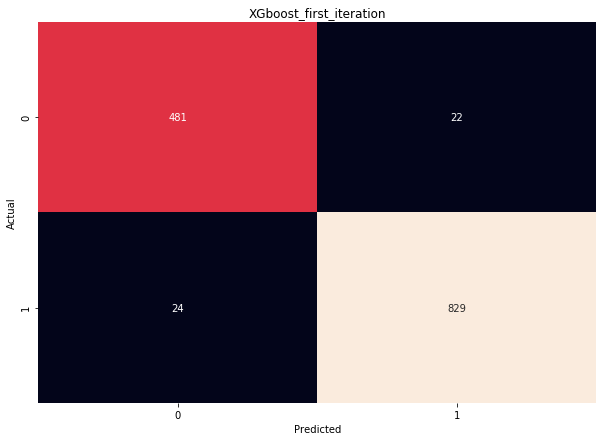

[None]

In [965]:
#Applying Model
!pip install xgboost
from xgboost.sklearn import XGBClassifier  
xgb_1=XGBClassifier(random_state=0)
xgb_1.fit(X_train,y_train)
P1_xgb= pd.DataFrame(xgb_1.predict(X_test))
print(xgb_1.score(X_test,y_test))
# visualization 
confusionmatrix(y_test,P1_xgb,x='XGboost_first_iteration') 

### So there are 22 customers which have been predicted by XGboost as potential customers since they changed values from 0 to 1 in first iteration

In [966]:
#Testing set dataframe for first iteration
P1_out_1= X_test_original.reset_index()
P1_out_1["Actual"] = y_test.reset_index()["Actual"]
P1_out_1["XGBoost_I1"] = P1_xgb.reset_index()[0]
P1_out_1.drop(["index"],axis=1,inplace=True)
P1_out_1.head()

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize:100,Actual,XGBoost_I1
0,0.421410,0.895901,1.000000,0.643173,0.19579,3338,1429,3388.0,2332.0,3396.0,...,0,0,0,0,1,1,0,0,1,1
1,0.699084,0.030111,0.783324,0.000000,0.33016,35005,69958,87853.0,0.0,100071.0,...,0,0,0,0,1,0,0,0,0,0
2,0.006203,0.026250,0.380441,0.000185,0.96035,4904,67,4982.0,86.0,10801.0,...,0,0,0,1,0,0,0,0,0,0
3,1.000000,0.000325,0.086699,0.003447,0.17514,15953,15997,16389.0,1550.0,15375.0,...,0,0,0,0,1,0,0,0,1,1
4,0.054817,0.188551,0.592673,0.014925,0.97552,2278,202,2360.0,2509.0,3686.0,...,0,0,0,1,0,1,0,0,1,0


#### This is the entire test data which was used in the first iteration . We will remove this data and use the training data as the total dataset for the next iteration

## Second iteration

In [967]:
#Now we will again use the training data as the total data and run the xgb on that data
P1_labels=y_train
P1_predictors=X_train_original
P1_predictors.head()

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var1_new,Var2_new,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize:100
911,0.062089,0.000278,0.089734,0.014584,0.02227,8203,567,8241.0,10069.0,10207.0,...,1,1,0,0,1,0,0,0,0,0
439,0.068637,0.015481,0.056029,0.020786,0.26330,5595,634,5602.0,5299.0,9237.0,...,1,0,0,0,1,0,0,1,0,0
713,0.013820,0.000124,0.024455,1.000000,0.76873,20957,362,20957.0,2735.0,33649.0,...,1,0,0,0,0,1,0,0,0,0
4137,0.013594,0.011851,0.247473,0.000697,0.31912,2394,39,2416.0,1090.0,4069.0,...,1,0,0,0,1,0,0,1,0,0
3825,0.083077,0.002179,0.170000,0.000000,0.37114,1976,648,1982.0,0.0,7800.0,...,1,0,0,0,1,0,0,1,0,0


0.958904109589041


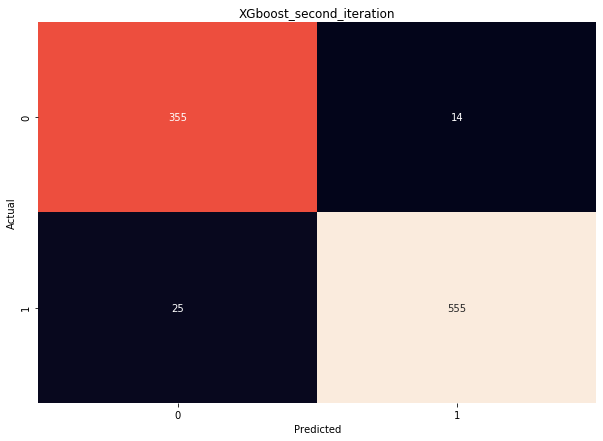

[None]

In [968]:
#Random Split of data
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(P1_predictors, P1_labels, test_size=0.3, random_state=1)
#Creating copy of test and train data 
X_train_original_2=X_train.copy()
X_test_original_2=X_test.copy()

#Scaling the numerical data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.fit_transform(X_train[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.transform(X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test.head()

#Applying Model
from xgboost import XGBClassifier  
xgb_2=XGBClassifier(random_state=0)
xgb_2.fit(X_train, y_train)
P1_xgb= pd.DataFrame(xgb_2.predict(X_test))
print(xgb_2.score(X_test,y_test))
# visualization 
confusionmatrix(y_test,P1_xgb,x='XGboost_second_iteration') 

### So there are 14 customers which have been predicted by XGboost as potential customers since they changed values from 0 to 1 in second iteration

In [969]:
#Testing set dataframe for second iteration
P1_out_2 = X_test_original_2.reset_index()
P1_out_2["Actual"] = y_test.reset_index()["Actual"]
P1_out_2["XGBoost_I2"] = P1_xgb.reset_index()[0]
P1_out_2.drop(["index"],axis=1,inplace=True)
P1_out_2.head()

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize:100,Actual,XGBoost_I2
0,0.013063,0.297047,0.052987,0.000136,0.63364,3447,96,3466.0,597.0,7349.0,...,0,0,0,1,0,1,0,0,0,0
1,0.201818,0.044318,0.625455,0.007727,0.60786,3176,888,3398.0,1439.0,4400.0,...,0,0,0,1,0,1,0,0,1,1
2,0.080000,0.031496,0.380000,0.004000,0.29688,8597,26,8644.0,76.0,14579.0,...,0,0,1,0,0,0,0,0,1,0
3,0.000000,0.148009,0.000656,0.000000,0.27905,2842,0,3796.0,0.0,13486.0,...,0,0,1,0,0,0,0,0,0,0
4,0.068000,0.219200,0.015000,0.000000,0.00475,1552,85,1555.0,157.0,1250.0,...,0,0,0,1,0,1,0,0,1,1


#### This is the entire test data which was used in the second iteration . We will remove this data and use the training data as the total dataset for the next iteration

### Third iteration

0.9487951807228916


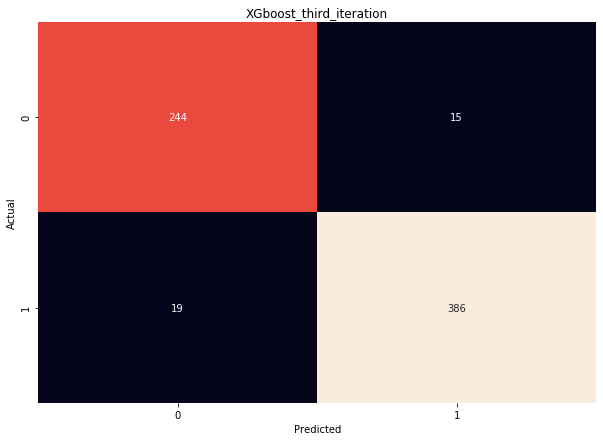

[None]

In [970]:
#Now we will again use the training data as the total data and run the random forest on that data
P1_labels=y_train
P1_predictors=X_train_original_2
P1_predictors.head()

#Random Split of data
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(P1_predictors, P1_labels, test_size=0.3, random_state=1)

#Creating copy of test and train data 
X_train_original_3=X_train.copy()
X_test_original_3=X_test.copy()

#Scaling the numerical data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.fit_transform(X_train[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.transform(X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test.head()

#Applying Model
from xgboost import XGBClassifier  
xgb_3=XGBClassifier(random_state=0)
xgb_3.fit(X_train, y_train)
P1_xgb= pd.DataFrame(xgb_3.predict(X_test))
print(xgb_3.score(X_test,y_test))

# visualization 
confusionmatrix(y_test,P1_xgb,x='XGboost_third_iteration') 

### So there are 15 customers which have been predicted by XGboost as potential customers since they changed values from 0 to 1 in third iteration

In [971]:
#Testing set dataframe for third iteration
P1_out_3 = X_test_original_3.reset_index()
P1_out_3["Actual"] = y_test.reset_index()["Actual"]
P1_out_3["XGBoost_I3"] = P1_xgb.reset_index()[0]
P1_out_3.drop(["index"],axis=1,inplace=True)
P1_out_3.head()

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize:100,Actual,XGBoost_I3
0,0.739964,0.211143,0.722143,0.001429,0.86715,5745,5677,6081.0,3.0,7672.0,...,0,0,0,0,1,1,0,0,1,1
1,0.129774,0.196610,0.417040,0.084746,0.86541,5216,384,5250.0,820.0,6500.0,...,0,0,1,0,0,1,0,0,1,1
2,0.003738,0.006915,0.001433,0.030278,0.34617,65,60,200.0,1588.0,16061.0,...,0,1,0,0,0,0,0,0,0,0
3,0.236526,0.193787,0.846811,0.000000,0.14190,4404,1242,4501.0,0.0,5251.0,...,0,0,0,1,0,1,0,0,1,1
4,0.001999,0.000064,0.000000,0.028455,0.36733,883,94,937.0,1510.0,47022.0,...,0,1,0,0,0,0,0,0,0,0


#### This is the entire test data which was used in the third iteration . 

## Fourth iteration

#### This time we will use all the data which had 0 as actual value in the original data as the test data and run Xgboost on that data

In [972]:
Test_data=P1_data[P1_data["Actual"]==0]
Test_data=Test_data.rename(columns={"CustSize_<100":"CustSize:100"})
X_test=Test_data.drop(["Actual","P1_Ratio"],axis=1)
X_test_original_4=X_test.copy()
y_test=Test_data["Actual"]

#Scaling xtest
X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.fit_transform(X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])

0.7759593679458239


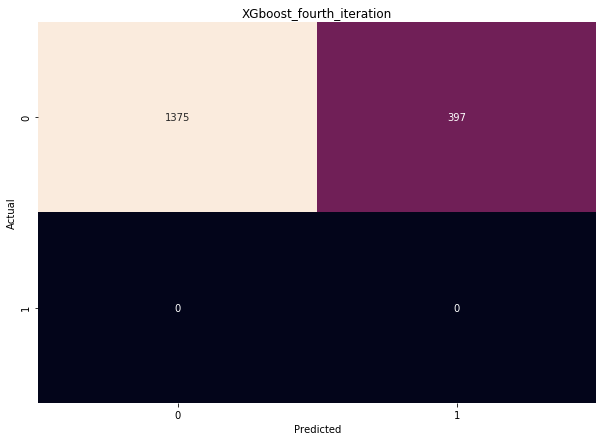

[None]

In [973]:
#Applying Model using XGboost classifier form first iteration
xgb_1.fit(X_train, y_train)
P1_xgb= pd.DataFrame(xgb_1.predict(X_test))
print(xgb_1.score(X_test,y_test))
# visualization 
confusionmatrix(y_test,P1_xgb,x='XGboost_fourth_iteration')

### This shows that 397 values out of original data which were 0 are predicted to be 1.We can see that there are no data with Actual values as '1'. This is beacuse the test data only contained observations which had actual value as '0'

In [974]:
#Testing set dataframe for fourth iteration
P1_out_4 = X_test_original_4.reset_index()
P1_out_4["Actual"] = y_test.reset_index()["Actual"]
P1_out_4["XGBoost_I4"] = P1_xgb.reset_index()[0]
P1_out_4.drop(["index"],axis=1,inplace=True)
P1_out_4

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize:100,Actual,XGBoost_I4
0,0.000000,0.000000,0.000400,0.000557,0.65581,137432,0,137438.0,13229.0,910000.0,...,0,1,0,0,0,0,0,0,0,0
1,0.004538,0.030000,0.041000,0.000000,0.67752,198,59,210.0,176.0,13000.0,...,0,1,0,0,0,0,0,0,0,0
2,0.355429,0.279214,0.349805,0.060000,0.72895,12446,9952,18601.0,17541.0,34621.0,...,0,0,0,1,0,0,0,0,0,0
3,0.006691,0.031902,0.014624,0.001227,0.82413,167,36,222.0,220.0,5380.0,...,0,1,0,0,0,1,0,0,0,0
4,0.043292,0.000000,0.226571,0.000000,0.70202,1,313,1671.0,0.0,7230.0,...,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,0.010155,0.006915,0.001869,0.074076,0.89333,102,163,304.0,10755.0,16061.0,...,0,1,0,0,0,0,0,0,0,0
1768,0.070715,0.038772,0.079594,0.003720,0.96454,6590,3489,6659.0,99.0,49339.0,...,1,1,0,0,0,0,0,0,0,0
1769,0.016881,0.000000,0.084110,0.003209,0.43414,11,121,441.0,6986.0,14456.0,...,0,1,0,0,0,0,0,0,0,0
1770,0.015323,0.046129,0.042097,0.001290,0.60132,744,95,760.0,5.0,6200.0,...,0,1,0,0,0,1,0,0,0,0


#### This is the entire test data which was used in the fourth iteration . 

In [975]:
P1_out_1=P1_out_1.rename(columns={"CustSize:100":"CustSize_<100"})
P1_out_2=P1_out_2.rename(columns={"CustSize:100":"CustSize_<100"})
P1_out_3=P1_out_3.rename(columns={"CustSize:100":"CustSize_<100"})
P1_out_4=P1_out_4.rename(columns={"CustSize:100":"CustSize_<100"})

In [976]:
#Merging all the four dataframes 
P1_out_xgb=pd.merge(P1_out_1,P1_out_2,how="outer",left_on=["Var1_new","Var2_new","Var3_new","P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"],right_on=["Var1_new","Var2_new","Var3_new","P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"])
P1_out_xgb=pd.merge(P1_out_3,P1_out_xgb,how="outer",left_on=["Var1_new","Var2_new","Var3_new","P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"],right_on=["Var1_new","Var2_new","Var3_new","P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"])
P1_out_xgb=pd.merge(P1_out_4,P1_out_xgb,how="outer",left_on=["Var1_new","Var2_new","Var3_new","P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"],right_on=["Var1_new","Var2_new","Var3_new","P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"])
P1_out_xgb=P1_out_xgb[P1_out_xgb["Actual"]==0]
P1_out_xgb

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100,Actual,XGBoost_I4,XGBoost_I3,XGBoost_I1,XGBoost_I2
0,0.000000,0.000000,0.000400,0.000557,0.65581,137432,0,137438.0,13229.0,910000.0,...,0,0,0,0,0,0,0.0,0.0,NaN,NaN
1,0.004538,0.030000,0.041000,0.000000,0.67752,198,59,210.0,176.0,13000.0,...,0,0,0,0,0,0,0.0,NaN,NaN,NaN
2,0.355429,0.279214,0.349805,0.060000,0.72895,12446,9952,18601.0,17541.0,34621.0,...,1,0,0,0,0,0,0.0,0.0,NaN,NaN
3,0.006691,0.031902,0.014624,0.001227,0.82413,167,36,222.0,220.0,5380.0,...,0,0,1,0,0,0,0.0,NaN,NaN,0.0
4,0.043292,0.000000,0.226571,0.000000,0.70202,1,313,1671.0,0.0,7230.0,...,0,0,1,0,0,0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,0.010155,0.006915,0.001869,0.074076,0.89333,102,163,304.0,10755.0,16061.0,...,0,0,0,0,0,0,0.0,0.0,NaN,NaN
1768,0.070715,0.038772,0.079594,0.003720,0.96454,6590,3489,6659.0,99.0,49339.0,...,0,0,0,0,0,0,0.0,NaN,NaN,NaN
1769,0.016881,0.000000,0.084110,0.003209,0.43414,11,121,441.0,6986.0,14456.0,...,0,0,0,0,0,0,0.0,NaN,0.0,NaN
1770,0.015323,0.046129,0.042097,0.001290,0.60132,744,95,760.0,5.0,6200.0,...,0,0,1,0,0,0,0.0,0.0,NaN,NaN


#### So this is the daframe containing the predictions of the four iterations done using XGboost Classifier on the data which had actual value as 0.This will contain data which has atleast been tested once and at maximuim ,twice i.e. if it were present in the first three iterations as part of the test data

## Merging of the Models

In [977]:
#Merging all the  four algorithms' dataframes
P1_pot=pd.merge(P1_out_logreg,P1_out_dec_tree,how="outer",left_on=["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"],right_on=["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"])
P1_pot=pd.merge(P1_out_ran_forest,P1_pot,how="outer",left_on=["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"],right_on=["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"])
P1_pot=pd.merge(P1_out_xgb,P1_pot,how="outer",left_on=["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"],right_on=["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Actual","Segment_S_2","Segment_S_3","Segment_S_4","Segment_S_5","CustSize_1K+","CustSize_500+","CustSize_<100","Difference_years"])
P1_pot=pd.merge(P1_pot,data,how="inner",left_on=["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Difference_years"],right_on=["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91","Difference_years"])
P1_pot.head()

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var1,Var2,Var3,Purchase_date,P1_Ratio,Segment,CustSize,Cutoff_date,Difference,Difference_months
0,0.000000,0.000000,0.000400,0.000557,0.65581,137432,0,137438.0,13229.0,910000.0,...,True,False,False,2018-08-06,0.151024,S_2,10K+,2019-12-31,512 days,16.821701
1,0.004538,0.030000,0.041000,0.000000,0.67752,198,59,210.0,176.0,13000.0,...,True,False,False,2018-02-04,0.015231,S_2,10K+,2019-12-31,695 days,22.834144
2,0.355429,0.279214,0.349805,0.060000,0.72895,12446,9952,18601.0,17541.0,34621.0,...,True,False,False,2017-01-07,0.359493,S_4,10K+,2019-12-31,1088 days,35.746114
3,0.006691,0.031902,0.014624,0.001227,0.82413,167,36,222.0,220.0,5380.0,...,True,False,False,2015-05-20,0.102454,S_2,1K+,2019-12-31,1686 days,55.393335
4,0.043292,0.000000,0.226571,0.000000,0.70202,1,313,1671.0,0.0,7230.0,...,True,False,True,2015-03-20,0.000143,S_3,1K+,2019-12-31,1747 days,57.397482


#### This dataframe contains the features used and the predicted classes of all the data ,with actual value as zero, as predicted by the 16 iterations with 4 iterations across each of the 4 models used. 

In [978]:
P1_pot.columns

Index(['P2_Ratio', 'P3_Ratio', 'P4_Ratio', 'P5_Ratio', 'P6_Ratio', 'P1_Size',
       'P2_Size', 'P3_Size', 'P4_Size', 'P5_Size', 'P6_Size', 'P1_E', 'P2_E',
       'P3_E', 'P4_E', 'P5_E', 'P6_E', 'P7', 'P8', 'P9', 'P71', 'P81', 'P91',
       'Difference_years', 'Var1_new_x', 'Var2_new_x', 'Var3_new_x',
       'Segment_S_2', 'Segment_S_3', 'Segment_S_4', 'Segment_S_5',
       'CustSize_1K+', 'CustSize_500+', 'CustSize_<100', 'Actual',
       'XGBoost_I4', 'XGBoost_I3', 'XGBoost_I1', 'XGBoost_I2', 'Var1_new_y',
       'Var2_new_y', 'Var3_new_y', 'Random_Forest_I4', 'Random_Forest_I3',
       'Random_Forest_I1', 'Random_Forest_I2', 'Var1_new_x', 'Var2_new_x',
       'Var3_new_x', 'Logistic_Reg_I4', 'Logistic_Reg_I3', 'Logistic_Reg_I1',
       'Logistic_Reg_I2', 'Var1_new_y', 'Var2_new_y', 'Var3_new_y',
       'Decison_Tree_I4', 'Decison_Tree_I3', 'Decison_Tree_I1',
       'Decison_Tree_I2', 'Month', 'CustomerID', 'Var1', 'Var2', 'Var3',
       'Purchase_date', 'P1_Ratio', 'Segment', 'CustS

In [979]:
P1_pot.shape

(1772, 72)

In [980]:
#Choosing certain columns of dataframe to another for easy visualisation and anaylsis
P1_pot_2=P1_pot[["CustomerID",'Logistic_Reg_I1', 'Logistic_Reg_I2','Logistic_Reg_I3', 'Logistic_Reg_I4','Decison_Tree_I1', 'Decison_Tree_I2','Decison_Tree_I3', 'Decison_Tree_I4','Random_Forest_I1','Random_Forest_I2','Random_Forest_I3','Random_Forest_I4','XGBoost_I1', 'XGBoost_I2','XGBoost_I3', 'XGBoost_I4']]
#Since some data will have missing values as the predicted values in the first three iterations for each data, we fill those values with zero 
P1_pot_2=P1_pot_2.fillna(0)
P1_pot_2

,CustomerID,Logistic_Reg_I1,Logistic_Reg_I2,Logistic_Reg_I3,Logistic_Reg_I4,Decison_Tree_I1,Decison_Tree_I2,Decison_Tree_I3,Decison_Tree_I4,Random_Forest_I1,Random_Forest_I2,Random_Forest_I3,Random_Forest_I4,XGBoost_I1,XGBoost_I2,XGBoost_I3,XGBoost_I4
0,1M5SLMHPRTFCESASSZLZW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3XSJR5MKXZCEL2600TMA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9OLKMYQNHEMH7LXOPUZGW,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9VIOZ707K3P34OT1BJQA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AMOKKMBYMF5QZZSMNZ5Q,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,IEUEJVL7NU9S7JYPQRWSW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1768,IEY3FMQKBW4QFTVWDQFY6W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1769,IF4NJDJ8OZMDW74IGNLR4W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1770,IFPO8LRLWSSJWFEIHDBQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [981]:
#Calculating the sum i.e. in how many iterations was the data predicted as having P1_State as 1
P1_pot_2["Sum"]=P1_pot_2[['Logistic_Reg_I1', 'Logistic_Reg_I2','Logistic_Reg_I3', 'Logistic_Reg_I4','Decison_Tree_I1', 'Decison_Tree_I2','Decison_Tree_I3', 'Decison_Tree_I4','Random_Forest_I1','Random_Forest_I2','Random_Forest_I3','Random_Forest_I4','XGBoost_I1', 'XGBoost_I2','XGBoost_I3', 'XGBoost_I4']].sum(axis=1)
P1_pot_2

,CustomerID,Logistic_Reg_I1,Logistic_Reg_I2,Logistic_Reg_I3,Logistic_Reg_I4,Decison_Tree_I1,Decison_Tree_I2,Decison_Tree_I3,Decison_Tree_I4,Random_Forest_I1,Random_Forest_I2,Random_Forest_I3,Random_Forest_I4,XGBoost_I1,XGBoost_I2,XGBoost_I3,XGBoost_I4,Sum
0,1M5SLMHPRTFCESASSZLZW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3XSJR5MKXZCEL2600TMA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9OLKMYQNHEMH7LXOPUZGW,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,9VIOZ707K3P34OT1BJQA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AMOKKMBYMF5QZZSMNZ5Q,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,IEUEJVL7NU9S7JYPQRWSW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1768,IEY3FMQKBW4QFTVWDQFY6W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1769,IF4NJDJ8OZMDW74IGNLR4W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1770,IFPO8LRLWSSJWFEIHDBQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [982]:
P1_pot["Sum"]=P1_pot_2["Sum"]
P1_pot.head()

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var2,Var3,Purchase_date,P1_Ratio,Segment,CustSize,Cutoff_date,Difference,Difference_months,Sum
0,0.000000,0.000000,0.000400,0.000557,0.65581,137432,0,137438.0,13229.0,910000.0,...,False,False,2018-08-06,0.151024,S_2,10K+,2019-12-31,512 days,16.821701,0.0
1,0.004538,0.030000,0.041000,0.000000,0.67752,198,59,210.0,176.0,13000.0,...,False,False,2018-02-04,0.015231,S_2,10K+,2019-12-31,695 days,22.834144,0.0
2,0.355429,0.279214,0.349805,0.060000,0.72895,12446,9952,18601.0,17541.0,34621.0,...,False,False,2017-01-07,0.359493,S_4,10K+,2019-12-31,1088 days,35.746114,2.0
3,0.006691,0.031902,0.014624,0.001227,0.82413,167,36,222.0,220.0,5380.0,...,False,False,2015-05-20,0.102454,S_2,1K+,2019-12-31,1686 days,55.393335,0.0
4,0.043292,0.000000,0.226571,0.000000,0.70202,1,313,1671.0,0.0,7230.0,...,False,True,2015-03-20,0.000143,S_3,1K+,2019-12-31,1747 days,57.397482,1.0


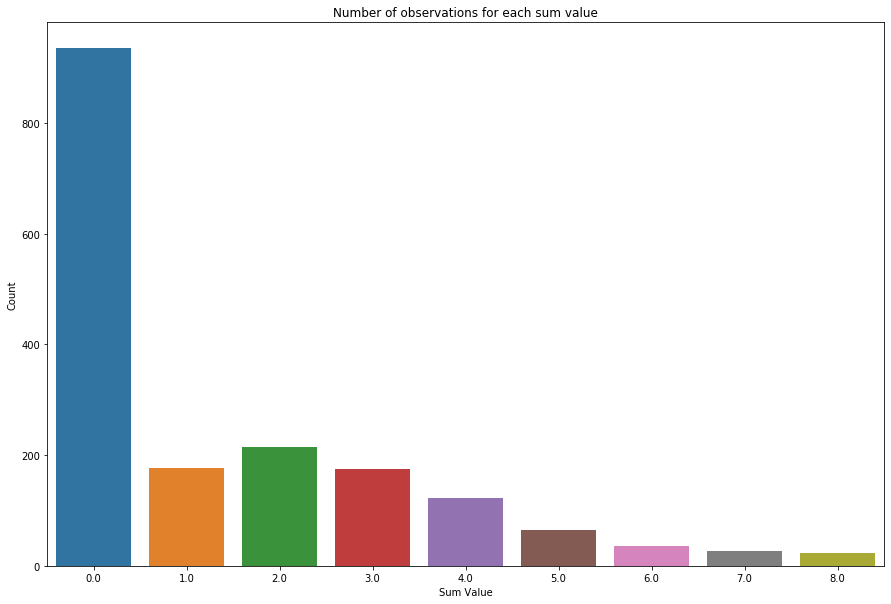

In [983]:
#Plotting the number of observations for each sum value for easy visualisation
plt.figure(figsize=(15,10))
sns.countplot(P1_pot_2["Sum"])
plt.ylabel("Count")
plt.xlabel("Sum Value")
plt.title("Number of observations for each sum value")
plt.show()

In [984]:
#Showing values with sum not equal to 0
P1_pot_2[P1_pot_2["Sum"]!=0]

,CustomerID,Logistic_Reg_I1,Logistic_Reg_I2,Logistic_Reg_I3,Logistic_Reg_I4,Decison_Tree_I1,Decison_Tree_I2,Decison_Tree_I3,Decison_Tree_I4,Random_Forest_I1,Random_Forest_I2,Random_Forest_I3,Random_Forest_I4,XGBoost_I1,XGBoost_I2,XGBoost_I3,XGBoost_I4,Sum
2,9OLKMYQNHEMH7LXOPUZGW,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,AMOKKMBYMF5QZZSMNZ5Q,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,ATSLJTJCJYJ5WZJVCX4PW,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0
8,DDPMHVGM5PBBUQVH92GUW,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0
12,EMZW2YHAUFEZ8GV1OSR9G,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,ICGLZRCEEKII2XQKMWGBGQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1759,ICPSMR7LIYWRTHK9APFUG,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1763,IEHYUTIXBWMJXMVUX7SVG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0
1765,IEKERTZF4T8912UVFGRUW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


#### So there are 837 customers who are going from 0 to 1 in atleast one of the iterations

In [985]:
P1_pot_2.to_excel("P1_customers.xlsx")

# 4.Regression Part

### Now we will use K-Nearest Neighbors in order to predict the possible changes for the potential targets calculated above

In [986]:
P1_data

,P1_Ratio,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,...,Var2_new,Var3_new,Actual,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100
0,0.742353,0.460392,0.718140,0.351200,0.008627,0.87552,1893,1174,1917.0,291.0,...,0,0,1,0,0,0,1,1,0,0
1,0.609234,0.002651,0.000113,0.025484,0.075343,0.77961,20452,89,20482.0,7678.0,...,1,0,1,0,1,0,0,0,0,0
2,0.771869,0.057143,0.028571,0.300000,0.028571,0.07483,8665,20,8668.0,28.0,...,0,0,1,0,1,0,0,0,0,0
3,0.877647,0.066667,0.135714,0.223967,0.000000,0.43330,2984,84,2990.0,6.0,...,0,0,1,0,1,0,0,1,0,0
4,0.661285,0.007608,0.001467,0.005041,0.000092,0.62645,8520,83,8528.0,398.0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4512,0.779210,0.502673,0.252166,0.159631,0.002949,0.06249,6409,2727,6441.0,827.0,...,1,0,1,0,0,1,0,1,0,0
4513,0.844230,0.000615,0.092539,0.805903,0.000512,0.36173,8238,6,8615.0,14.0,...,1,0,1,0,0,1,0,1,0,0
4514,0.871611,0.822006,0.487660,0.051064,0.073070,0.48464,7169,6761,7309.0,2456.0,...,1,0,1,0,0,0,1,1,0,0
4515,0.043484,0.024581,0.067333,0.399467,0.000129,0.45853,674,381,3776.0,159.0,...,0,0,0,1,0,0,0,0,0,0


In [987]:
X=P1_data.drop(columns=["P1_Ratio","Actual"])
y=P1_data["P1_Ratio"]
X.shape

(4517, 34)

In [988]:
#Random Split of data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [989]:
X_train.columns

Index(['P2_Ratio', 'P3_Ratio', 'P4_Ratio', 'P5_Ratio', 'P6_Ratio', 'P1_Size',
       'P2_Size', 'P3_Size', 'P4_Size', 'P5_Size', 'P6_Size', 'P1_E', 'P2_E',
       'P3_E', 'P4_E', 'P5_E', 'P6_E', 'P7', 'P8', 'P9', 'P71', 'P81', 'P91',
       'Difference_years', 'Var1_new', 'Var2_new', 'Var3_new', 'Segment_S_2',
       'Segment_S_3', 'Segment_S_4', 'Segment_S_5', 'CustSize_1K+',
       'CustSize_500+', 'CustSize_<100'],
      dtype='object')

In [990]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.fit_transform(X_train[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.transform(X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test.head()

,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,P5_Size,...,Var1_new,Var2_new,Var3_new,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100
4462,0.077632,0.342363,0.588792,0.000000,0.571717,0.309218,0.113733,0.503915,0.000000,0.124396,...,1,1,0,0,0,1,0,0,0,0
1580,0.011933,0.000091,0.005707,0.000000,0.458704,0.000045,0.029016,0.012889,0.000000,0.206456,...,1,0,0,1,0,0,0,0,0,0
1750,0.002123,0.000708,0.007785,0.023001,0.167774,0.000035,0.000233,0.000353,0.000334,0.009315,...,1,0,0,1,0,0,0,1,0,0
1487,0.113266,0.044357,0.101300,0.107489,0.329155,0.039215,0.007105,0.039328,0.004418,0.005325,...,1,1,0,0,1,0,0,1,0,0
2806,0.365301,0.181741,0.259003,0.011023,0.972560,0.025263,0.029184,0.025738,0.003071,0.006782,...,1,1,0,0,0,1,0,1,0,0


In [991]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3387, 34)
(3387,)
(1130, 34)
(1130,)


In [992]:
# Performing KNN Regression on random split of data in order to know the optimum value of k i.e. number of neighbors to be used as parameter for the least error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
k_range=range(1,7)
scores=list()
#Perfoming regression for k values ranging from 1 to 20
for i in k_range:
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores.append(mean_squared_error(y_test,y_pred))
min_error=min(scores)
optimum_k=scores.index(min_error)+1
print("Minimuim mean squared error is :",min_error)
print(optimum_k)

Minimuim mean squared error is : 0.04713108545189251
5


### So we see that the optiuim value of k for least mean squared error is 5 and we will use this as the parameter in the regression analysis

# Recursive feature extraction

#### We perform recursive feature extraction using Random Forest Regressor in order to know the 15 features which are most useful for the regression of P_1 Ratios

In [993]:
#Performing recursive feature extraction
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
sel = RFE(RandomForestRegressor(n_estimators=100,random_state=0),n_features_to_select=1, verbose =3)
sel.fit(X_train,y_train)

Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 featu

RFE(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                    criterion='mse', max_depth=None,
                                    max_features='auto', max_leaf_nodes=None,
                                    max_samples=None, min_impurity_decrease=0.0,
                                    min_impurity_split=None, min_samples_leaf=1,
                                    min_samples_split=2,
                                    min_weight_fraction_leaf=0.0,
                                    n_estimators=100, n_jobs=None,
                                    oob_score=False, random_state=0, verbose=0,
                                    warm_start=False),
    n_features_to_select=1, step=1, verbose=3)

In [994]:
#Sorting features according to their rank i.e. their importance in prediction of P1_Ratio values
names=X.columns
print("Features sorted by their rank:")
t=sorted(zip(map(lambda x: round(x, 4), sel.ranking_), names))
print(t)
#print sorted(zip(map(lambda x: round(x, 4), sel.ranking_), names))

Features sorted by their rank:
[(1, 'P1_E'), (2, 'P5_Size'), (3, 'Segment_S_2'), (4, 'P1_Size'), (5, 'P7'), (6, 'P5_E'), (7, 'P3_Ratio'), (8, 'P3_Size'), (9, 'P2_Ratio'), (10, 'P6_E'), (11, 'P8'), (12, 'P5_Ratio'), (13, 'P9'), (14, 'P4_Ratio'), (15, 'P6_Size'), (16, 'P81'), (17, 'P2_E'), (18, 'P6_Ratio'), (19, 'P71'), (20, 'P4_Size'), (21, 'P3_E'), (22, 'P2_Size'), (23, 'Difference_years'), (24, 'Segment_S_5'), (25, 'P91'), (26, 'P4_E'), (27, 'Segment_S_4'), (28, 'Var2_new'), (29, 'Segment_S_3'), (30, 'CustSize_1K+'), (31, 'CustSize_500+'), (32, 'CustSize_<100'), (33, 'Var3_new'), (34, 'Var1_new')]


#### So, this is the list containing the features arranged by their respective imporatnces. A higher rank i.e. 1 for P1_E means that it is most useful for regression of P1_Ratio and a lower rank i.e. 34 for Var1 means that it is least useful for prediction of P1_Ratio.

#### Note: We see that the P5_Size is considered to be very useful in prediction of the P1_Ratio and so , it might be that the P1 and P5 services have some correlation.

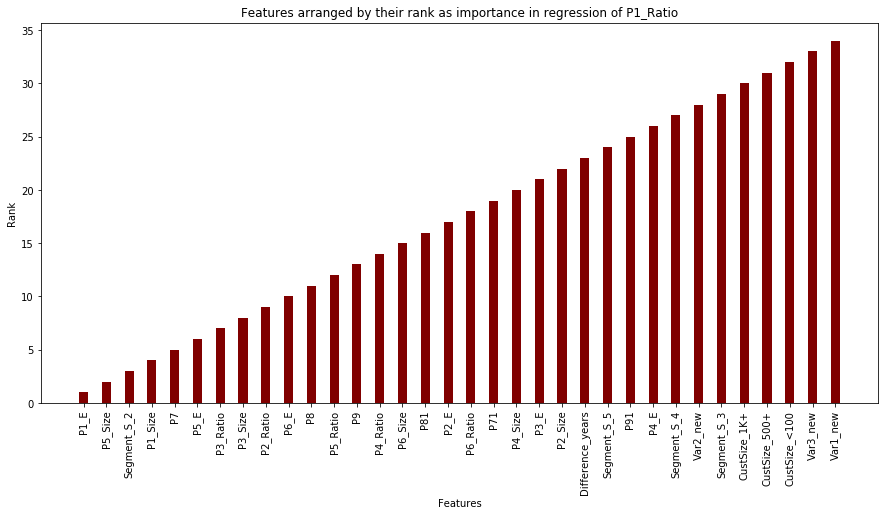

In [995]:
features=[]
rank=[]
for i in range(len(t)):
    fet=t[i][1]
    features.append(fet)
    rnk=t[i][0]
    rank.append(rnk)
    
# creating the bar plot 
plt.figure(figsize =(15, 7))
plt.bar(features, rank, color ='maroon',  
        width = 0.4) 
plt.xticks(rotation=90)
plt.title("Features arranged by their rank as importance in regression of P1_Ratio")
plt.xlabel("Features")
plt.ylabel("Rank")
plt.show()

#### This is the graph showing the features according to their rank

In [996]:
#We select the top 15 most useful features
imp_features=features[:15]
imp_features

['P1_E',
 'P5_Size',
 'Segment_S_2',
 'P1_Size',
 'P7',
 'P5_E',
 'P3_Ratio',
 'P3_Size',
 'P2_Ratio',
 'P6_E',
 'P8',
 'P5_Ratio',
 'P9',
 'P4_Ratio',
 'P6_Size']

In [997]:
X_train_rfe = X_train[imp_features]
X_test_rfe = X_test[imp_features]

In [998]:
#The 15 best features are used as faetures in training and test data
print(X_train_rfe.shape)
print(X_test_rfe.shape)

(3387, 15)
(1130, 15)


In [999]:
#Perfoming KNN Regression using these features only on the random split of data 
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=optimum_k)
knn.fit(X_train_rfe,y_train)
y_test_pred=pd.Series(knn.predict(X_test_rfe))
y_train_pred=pd.Series(knn.predict(X_train_rfe))
print("The mean squared error for training set is :",mean_squared_error(y_train,y_train_pred))
print("The mean squared error for test set is :",mean_squared_error(y_test,y_test_pred))
#The mean squared error for the test set decreases from 0.0465 to 0.0375

The mean squared error for training set is : 0.025325024029820637
The mean squared error for test set is : 0.03751687963793311


#### So we can see that using recursive feature selection , the mean squared error reduces so we will use these features only to compute the regression for our potential customers also

## 5. Final Analysis

### Now we will perform the KNN Regression on the data such that the training set contains only data with '1' value and the testing set contains data with only '0' value

In [1000]:
#Setting the data which has actual as 1 as train and which has actual as 0 as test data
X_train=P1_data[P1_data["Actual"]==1]
X_test=P1_data[P1_data["Actual"]==0]
y_train=(P1_data[P1_data["Actual"]==1])["P1_Ratio"]
y_test=(P1_data[P1_data["Actual"]==0])["P1_Ratio"]
X_test_original_reg=X_test.copy()

In [1001]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2745, 36)
(2745,)
(1772, 36)
(1772,)


In [1002]:
#Scaling of test and train data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.fit_transform(X_train[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]]=scaler.transform(X_test[["P2_Ratio","P3_Ratio","P4_Ratio","P5_Ratio","P6_Ratio","P1_Size","P2_Size","P3_Size","P4_Size","P5_Size","P6_Size","P1_E","P2_E","P3_E","P4_E","P5_E","P6_E","P7","P8","P9","P71","P81","P91"]])
X_test.head()

,P1_Ratio,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,...,Var2_new,Var3_new,Actual,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100
9,0.151024,0.000000,0.000000,0.000400,0.000557,0.655843,0.683580,0.000000,0.682849,0.052640,...,0,0,0,1,0,0,0,0,0,0
11,0.015231,0.004538,0.030000,0.041000,0.000000,0.677554,0.000980,0.000838,0.000890,0.000700,...,0,0,0,1,0,0,0,0,0,0
22,0.359493,0.355429,0.279214,0.349805,0.060000,0.728986,0.061901,0.141424,0.092284,0.069798,...,0,0,0,0,0,1,0,0,0,0
24,0.102454,0.006691,0.031902,0.014624,0.001227,0.824171,0.000826,0.000512,0.000949,0.000875,...,0,0,0,1,0,0,0,1,0,0
30,0.000143,0.043292,0.000000,0.226571,0.000000,0.702055,0.000000,0.004448,0.008150,0.000000,...,0,1,0,0,1,0,0,1,0,0


In [1003]:
X_train_rfe = X_train[imp_features]
X_test_rfe = X_test[imp_features]
X_test_rfe.shape

(1772, 15)

In [1004]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=optimum_k)
knn.fit(X_train_rfe,y_train)
y_pred=pd.Series(knn.predict(X_test_rfe))
mean_squared_error(y_test,y_pred)

0.4818816503694683

In [1005]:
#Testing set dataframe for KNN-Regression
P1_reg_fin = X_test_original_reg.reset_index()
P1_reg_fin["P1_Ratio"]=y_test.reset_index(drop=True)
P1_reg_fin["P1_Ratio_pred"]=y_pred.reset_index(drop=True)
P1_reg_fin.drop(["index"],axis=1,inplace=True)
P1_reg_fin
#This contains the predicted P1_Ratio values for the dataset

,P1_Ratio,P2_Ratio,P3_Ratio,P4_Ratio,P5_Ratio,P6_Ratio,P1_Size,P2_Size,P3_Size,P4_Size,...,Var3_new,Actual,Segment_S_2,Segment_S_3,Segment_S_4,Segment_S_5,CustSize_1K+,CustSize_500+,CustSize_<100,P1_Ratio_pred
0,0.151024,0.000000,0.000000,0.000400,0.000557,0.65581,137432,0,137438.0,13229.0,...,0,0,1,0,0,0,0,0,0,0.828672
1,0.015231,0.004538,0.030000,0.041000,0.000000,0.67752,198,59,210.0,176.0,...,0,0,1,0,0,0,0,0,0,0.921659
2,0.359493,0.355429,0.279214,0.349805,0.060000,0.72895,12446,9952,18601.0,17541.0,...,0,0,0,0,1,0,0,0,0,0.793924
3,0.102454,0.006691,0.031902,0.014624,0.001227,0.82413,167,36,222.0,220.0,...,0,0,1,0,0,0,1,0,0,0.921659
4,0.000143,0.043292,0.000000,0.226571,0.000000,0.70202,1,313,1671.0,0.0,...,1,0,0,1,0,0,1,0,0,0.654262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,0.006351,0.010155,0.006915,0.001869,0.074076,0.89333,102,163,304.0,10755.0,...,0,0,1,0,0,0,0,0,0,0.921659
1768,0.220837,0.070715,0.038772,0.079594,0.003720,0.96454,6590,3489,6659.0,99.0,...,1,0,1,0,0,0,0,0,0,0.934118
1769,0.000761,0.016881,0.000000,0.084110,0.003209,0.43414,11,121,441.0,6986.0,...,0,0,1,0,0,0,0,0,0,0.921659
1770,0.120000,0.015323,0.046129,0.042097,0.001290,0.60132,744,95,760.0,5.0,...,0,0,1,0,0,0,1,0,0,0.921659


#### Merging classification and regression dataframes

In [1006]:
P1_final=pd.merge(P1_reg_fin,P1_pot,how="outer",left_on=['P2_Ratio', 'P3_Ratio', 'P4_Ratio', 'P5_Ratio', 'P6_Ratio', 'P1_Size',
       'P2_Size', 'P3_Size', 'P4_Size', 'P5_Size', 'P6_Size', 'P1_E', 'P2_E',
       'P3_E', 'P4_E', 'P5_E', 'P6_E', 'P7', 'P8', 'P9', 'P71', 'P81', 'P91',
       'Difference_years', 'Segment_S_2', 'Segment_S_3', 'Segment_S_4',
       'Segment_S_5', 'CustSize_1K+','P1_Ratio'],right_on=['P2_Ratio', 'P3_Ratio', 'P4_Ratio', 'P5_Ratio', 'P6_Ratio', 'P1_Size',
       'P2_Size', 'P3_Size', 'P4_Size', 'P5_Size', 'P6_Size', 'P1_E', 'P2_E',
       'P3_E', 'P4_E', 'P5_E', 'P6_E', 'P7', 'P8', 'P9', 'P71', 'P81', 'P91',
       'Difference_years', 'Segment_S_2', 'Segment_S_3', 'Segment_S_4',
       'Segment_S_5', 'CustSize_1K+','P1_Ratio'])
P1_output=P1_final[['CustomerID','P1_Ratio', 'P1_Ratio_pred','P1_Size','Sum']]
P1_output

,CustomerID,P1_Ratio,P1_Ratio_pred,P1_Size,Sum
0,1M5SLMHPRTFCESASSZLZW,0.151024,0.828672,137432,0.0
1,3XSJR5MKXZCEL2600TMA,0.015231,0.921659,198,0.0
2,9OLKMYQNHEMH7LXOPUZGW,0.359493,0.793924,12446,2.0
3,9VIOZ707K3P34OT1BJQA,0.102454,0.921659,167,0.0
4,AMOKKMBYMF5QZZSMNZ5Q,0.000143,0.654262,1,1.0
...,...,...,...,...,...
1767,IEUEJVL7NU9S7JYPQRWSW,0.006351,0.921659,102,0.0
1768,IEY3FMQKBW4QFTVWDQFY6W,0.220837,0.934118,6590,0.0
1769,IF4NJDJ8OZMDW74IGNLR4W,0.000761,0.921659,11,0.0
1770,IFPO8LRLWSSJWFEIHDBQ,0.120000,0.921659,744,0.0


In [1007]:
#Calculating difference in predicted and actual ratios
P1_output["P1_Delta"]=P1_output["P1_Ratio_pred"]-P1_output["P1_Ratio"]
#Calculating possible changes as per the size 
P1_output["P1_Potential"]=P1_output["P1_Delta"]*P1_output["P1_Size"]
P1_output.sort_values(by=["P1_Potential"],inplace=True,ascending=False)
P1_output

,CustomerID,P1_Ratio,P1_Ratio_pred,P1_Size,Sum,P1_Delta,P1_Potential
528,6SKXGUQ0SFNRIXQ9LXIWTA,0.224665,0.837685,204445,3.0,0.613020,125328.956455
531,6TNEPB3NUQPZVXUUFJ2LW,0.184124,0.837685,167553,2.0,0.653561,109506.116755
0,1M5SLMHPRTFCESASSZLZW,0.151024,0.828672,137432,0.0,0.677648,93130.527440
859,AYSDQ4PPBOI4CQPR13ILNQ,0.362188,0.797468,89012,2.0,0.435280,38745.180994
853,AXDSZPSTNOTEXDF9ZSVG,0.361012,0.797468,88732,1.0,0.436456,38727.654680
...,...,...,...,...,...,...,...
317,3F1QKITLM1PNGNF4YQ6EXA,0.000140,0.654262,1,2.0,0.654122,0.654122
4,AMOKKMBYMF5QZZSMNZ5Q,0.000143,0.654262,1,1.0,0.654119,0.654119
306,3B8EV8T0JTZ8MBEU2VXDJQ,0.000167,0.647387,1,2.0,0.647220,0.647220
635,8FBDBZZS1NQMEEXWICXY4G,0.000118,0.638842,1,1.0,0.638723,0.638723


#### This is the final output dataframe containing the sum values along with predicted changes in the P1_Ratio and the corrseponding Potential changes for all the observations originally considered to be '0'

### Analysis using different parameters ( Sir was checking some things ) 

In [1008]:
P1_output["P1_Ratio_pred"].quantile([0.1,0.2,0.3,0.4,0.45,0.5,0.55,0.6,0.7,0.8,0.9,1])

0.10    0.726011
0.20    0.769206
0.30    0.795298
0.40    0.826460
0.45    0.843749
0.50    0.858982
0.55    0.870654
0.60    0.899493
0.70    0.921659
0.80    0.921659
0.90    0.934118
1.00    0.995444
Name: P1_Ratio_pred, dtype: float64

In [1009]:
P1_output["P1_Ratio"].quantile([0.1,0.2,0.3,0.4,0.45,0.5,0.55,0.6,0.7,0.8,0.9,1])

0.10    0.000251
0.20    0.001206
0.30    0.007825
0.40    0.040005
0.45    0.074309
0.50    0.120893
0.55    0.187002
0.60    0.252920
0.70    0.354636
0.80    0.433899
0.90    0.492969
1.00    0.579736
Name: P1_Ratio, dtype: float64

In [1010]:
x=P1_output[(P1_output["P1_Ratio"]>=0.45) & (P1_output["Sum"]>=4) ]
x.shape

(178, 7)

In [1011]:
y=P1_output[(P1_output["P1_Ratio"]>=0.45) & (P1_output["Sum"]>=4) & (P1_output["P1_Potential"]>=1000)]
y.shape

(100, 7)

In [1012]:
P1_output.to_excel("P1_final_output.xlsx")

## Intuitive Testing

In [1013]:
for i in range(0,9):
    P1_pot_output=P1_output[P1_output["Sum"]>=i]
    from sklearn.metrics import mean_squared_error
    print(mean_squared_error(P1_pot_output["P1_Ratio"],P1_pot_output["P1_Ratio_pred"]))

0.4818816503694683
0.2526206164377424
0.21118984927877682
0.14751686331727454
0.12109299678631329
0.11617380829163265
0.10417615354910949
0.09880746849021374
0.0973668765113072


#### So we can see that as we increase the sum value the error decreases drastically . This is beacuse as sum increases, we are only taking values which are predicted more to be in the "1" group and hence the predicted value is not far from their real value.